# ==========================================================
# 📊 Usecase 6 Notebook
# ==========================================================
# 🏡 Dataset: Usecase 6 Project 3
# 📅 Date: 2025-02-20
# ✍️ Authors: Sultan - Ahmed - Jumanh - Kawther
# 📌 Purpose: Define at least 4 questions to answer using the data 
# ==========================================================

In [908]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import arabic_reshaper
from bidi.algorithm import get_display
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [909]:
#Read in the csv file and convert to a Pandas dataframe4
RiyadhVillasAqar = pd.read_csv('Data/RiyadhVillasAqar.csv', low_memory=False) # unknown
Riyadh_Aqqar = pd.read_excel('Data/Riyadh_Aqqar.xlsx') # unknown 
Riyadh_Aqqar_Villas = pd.read_excel('Data/Riyadh_Aqqar.xlsx' , sheet_name = 'Villas (الفلل)') # unknown
Riyadh_Aqqar_Apartments = pd.read_excel('Data/Riyadh_Aqqar.xlsx' , sheet_name = 'Apartments (الشقق)')
realEstate = pd.read_csv('Data/realEstate.csv') # It's written in kaggle 2022

In [910]:
realEstate1 = pd.read_csv('Data/realEstate.csv') # It's written in kaggle 2022

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [911]:
print("Riyadh Villas Aqar Shape:", RiyadhVillasAqar.shape)  
print("Real Estate Shape:", realEstate.shape)  
print("Riyadh Aqar Shape:", Riyadh_Aqqar.shape)  
print("Riyadh Aqar Apartments Shape:", Riyadh_Aqqar_Apartments.shape)  
print("Riyadh Aqar Villas Shape:", Riyadh_Aqqar_Villas.shape)  

Riyadh Villas Aqar Shape: (46826, 26)
Real Estate Shape: (6762, 30)
Riyadh Aqar Shape: (2155, 8)
Riyadh Aqar Apartments Shape: (551, 15)
Riyadh Aqar Villas Shape: (1090, 20)


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 



## realEstate

---------------------------------------------------------------------------------------------------------------------

In [912]:
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [913]:
realEstate1['title'].value_counts()

title
شقة للإيجار في حي الياسمين ، الرياض ، الرياض                                                                   127
شقة للإيجار في حي المونسية ، الرياض ، الرياض                                                                    82
شقة للإيجار في حي النرجس ، الرياض ، الرياض                                                                      53
شقة للإيجار في حي العارض ، الرياض ، الرياض                                                                      48
شقة للإيجار في حي الملقا ، الرياض ، الرياض                                                                      43
شقة للإيجار في شارع ابي جعفر المنصور ، حي اليرموك ، الرياض ، الرياض                                             42
شقة للإيجار في حي اليرموك ، الرياض ، الرياض                                                                     41
شقة للإيجار في شارع طريف ، حي النرجس ، الرياض ، الرياض                                                          40
شقة للإيجار في شارع قلعة الفسطاط ، حي اشبيلية ، الرياض ، الرياض           



##  RiyadhVillasAqar

-------------------------------------------------

In [914]:
RiyadhVillasAqar.head(1)

Unnamed: 0  front  rooms lounges bathrooms  streetWidth  stairs  \
0           0  شرقية      5       4        5+        20.00       1   

   propertyAge  driverRoom  tent  patio  kitchen  outdoorRoom  garage  duplex  \
0            0           1     1      1        1            1       1       1   

   space apartments  maidRoom  elevator  furnihsed  pool  basement  \
0    300          0         0         0          0     0         0   

  neighbourhood     location        price  square price  
0         عكاظ   جنوب الرياض 1,050,000.00      3,500.00




##  Riyadh_Aqqar

------------------------

In [915]:
Riyadh_Aqqar.head(1)

نوع العقار الغرض              المدينة      الحي الواجهة  المساحة  سعر المتر  \
0        أرض   NaN   امارة منطقة الرياض   الرياض    غربية      375   2,900.00   

   السعر الإجمالي  
0         1087500

In [916]:
Riyadh_Aqqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      2155 non-null   object 
 1   الغرض           2106 non-null   object 
 2   المدينة         2155 non-null   object 
 3   الحي            2155 non-null   object 
 4   الواجهة         2155 non-null   object 
 5   المساحة         2155 non-null   int64  
 6   سعر المتر       2155 non-null   float64
 7   السعر الإجمالي  2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [917]:
Riyadh_Aqqar_Apartments.head(10)
# Staris (الدور) -> conisity
# City -> Remove The column

نوع العقار   المدينة           الحي       الواجهة  عدد الغرف  عدد الصالات  \
0        شقة   الرياض      حي المروج         جنوبية          4         1.00   
1        شقة   الرياض      حي العارض   شمالية غربية          3         1.00   
2        شقة   الرياض      حي النرجس            NaN          3         1.00   
3        شقة   الرياض      حي النرجس         شمالية          3         1.00   
4        شقة   الرياض    حي الياسمين          شرقية          4         1.00   
5        شقة   الرياض    حي الياسمين            NaN          3         1.00   
6        شقة   الرياض      حي النرجس          شرقية          3         1.00   
7        شقة   الرياض      حي النرجس          شرقية          2         1.00   
8        شقة   الرياض      حي النرجس   جنوبية شرقية          3         1.00   
9        شقة   الرياض      حي العقيق            NaN          3         1.00   

  عدد الحمامات  المساحة  مطبخ  مدخل سيارة  مصعد الدور  عمر العقار  مؤثثة  \
0            3      249     1           0     1     3        0.00      0   
1            3      199     0           0     1  علوي        0.00      0   
2            3      145     1           0     1  أرضي        2.00      0   
3            3      101     1           0     0  أرضي        0.00      1   
4            3      147     1           0     1  علوي        2.00      1   
5            2      118     1           0     1     3        0.00      0   
6            3      112     1           0     0  أرضي        0.00      0   
7            3      100     1           0     1     3        0.00      0   
8            3      170     1           0     1  ثالث         NaN      1   
9            3      115     0           1     1   NaN       11.00      0   

   السعر الاجمالي  
0         1434000  
1          980000  
2         1050000  
3         1200000  
4         1200000  
5          850000  
6          885000  
7         1200000  
8          930000  
9         1100000

##  Riyadh_Aqqar_Villas

--------------------------

In [918]:
Riyadh_Aqqar_Villas.head(1)

نوع العقار   المدينة         الحي الواجهة عدد الغرف عدد الصالات  \
0       فيلا   الرياض    حي العارض   جنوبية         6           3   

  عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  غرفة خادمة  غرفة سائق  \
0           5+         NaN   244.00         1     1           1          1   

   ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي  
0     0    1     0    0           1     1         2300000

In [919]:
pd.set_option('display.max_columns', None)
realEstate.head(1)

user_id       id                                              title  price  \
0  1495817  4596035  شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...  20000   

       content                                               imgs  \
0  1666 كل شهر  ['014958174_1659666836308.jpg', '014958178_165...   

                      refresh  beds  livings  wc   area  street_width  age  \
0  ['2022-08-06', '12:22:15']     3     0.00   2 225.00         15.00 9.00   

                  last_update  ketchen   ac  furnished  \
0  ['2022-08-06', '12:22:15']     1.00 0.00       0.00   

                                            location  \
0  {'lat': 24.80093, 'lng': 46.89689, '__typename...   

                                                path   district  width  \
0  /شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...  حي النظيم  15.00   

   length advertiser_type                 create_time  review profileImg  \
0   15.00           owner  ['2022-08-05', '02:44:23']    5.00        NaN   

  UserName iam_verified  onMarket  IsRent  
0  Thamer          True        17   False

In [920]:
print(RiyadhVillasAqar.columns)
print("------------------------")
print(Riyadh_Aqqar_Apartments.columns)
print("------------------------")
print(Riyadh_Aqqar_Villas.columns)
print("------------------------")
print(Riyadh_Aqqar.columns)
print("------------------------")
print(realEstate.columns)

Index(['Unnamed: 0', 'front', 'rooms', 'lounges', 'bathrooms', 'streetWidth',
       'stairs', 'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen',
       'outdoorRoom', 'garage', 'duplex', 'space', 'apartments', 'maidRoom',
       'elevator', 'furnihsed', 'pool', 'basement', 'neighbourhood',
       'location', 'price', 'square price'],
      dtype='object')
------------------------
Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')
------------------------
Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'المساحة', 'درج صالة', 'مطبخ',
       'غرفة خادمة', 'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة',
       'مصعد', 'السعر الاجمالي'],
      dtype='object')
------------------------
Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجه

In [921]:
RiyadhVillasAqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [922]:
Riyadh_Aqqar_Apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [923]:
Riyadh_Aqqar_Villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      1090 non-null   object 
 1   المدينة         1090 non-null   object 
 2   الحي            1090 non-null   object 
 3   الواجهة         1059 non-null   object 
 4   عدد الغرف       993 non-null    object 
 5   عدد الصالات     967 non-null    object 
 6   عدد الحمامات    993 non-null    object 
 7   عرض الشارع      465 non-null    float64
 8   المساحة         1059 non-null   float64
 9   درج صالة        1090 non-null   int64  
 10  مطبخ            1090 non-null   int64  
 11  غرفة خادمة      1090 non-null   int64  
 12  غرفة سائق       1090 non-null   int64  
 13  ملحق            1090 non-null   int64  
 14  حوش             1090 non-null   int64  
 15  مسبح            1090 non-null   int64  
 16  قبو             1090 non-null   int64  
 17  مدخل سيارة      1090 non-null   i

In [924]:
# RiyadhVillasAqar[RiyadhVillasAqar.duplicated(keep=False)].sort_values(by = 'space')

In [925]:
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [926]:
realEstate['content'][10]

'يوجد شقه 🥀 للايجار عوائل 🏕️ مكونه من 💐\r\n\r\nغرفه نوم ⭐⭐⭐\r\nومطبخ 🌺 مستقل 🥀\r\nوحمام 🌹\r\nومكيفات 🌴 اسبلت جديد 🌹\r\nالتشطيب ممتاز بجد 🥀\r\nالشارع به جاميع الخدمات 🌉\r\nالعماره عوائل 🌾\r\nالرجاء في عدم الرد ✉️ ارسال رساله عل وتساب 🌹\r\n\r\nالسعر 20الف ريال دفعتين فقط 🌱\r\n👈👈👈👈.    بسام.    👉👉👉👉'

# ===============================================================

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [927]:
# We have verified the reliability of the datasets and confirmed that they originate from Saudi real estate websites ex: "Aqar website and Bayut website" based on the structure and data patterns, 
# Including neighborhood names, property details, and trends.

# ===============================================================

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [928]:
# The First Dataset (RiyadhVillasAqar) is Unknown
# The Second Dataset (Riyadh_Aqqar) is Unknown
# The Third Dataset (RiyadhVillasAqar) It's written in kaggle 2022 so we confirmed the period is 2022
# So the conclusion is:
# The timeline for one of the datasets was identified as 2022 based on the available data. 
# For the remaining two datasets, while no specific timeline was found, they were uploaded to Kaggle two years ago.
# Which suggests they could potentially align with the '2022' timeframe.

# ===============================================================

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [929]:
# For consistency, all datasets contained the necessary columns with logical meanings, but formatting adjustments were required to align them. 
# This included renaming columns and standardizing data types to ensure accurate comparisons across all three datasets.

In [930]:
# Rename the Riyadh_Aqqar columns to English names
Riyadh_Aqqar.rename(columns={
    "نوع العقار": "Property Type",
    "الغرض": "Purpose",
    "المدينة": "City",
    "الحي": "District",
    "الواجهة": "Front",
    "المساحة": "Area",
    "سعر المتر": "Square Price",
    "السعر الإجمالي": "Price"
}, inplace=True)
Riyadh_Aqqar.columns

Index(['Property Type', 'Purpose', 'City', 'District', 'Front', 'Area',
       'Square Price', 'Price'],
      dtype='object')

In [931]:
# Rename the Riyadh_Aqqar_Villas columns to English names
Riyadh_Aqqar_Villas = Riyadh_Aqqar_Villas.rename(columns={
    'نوع العقار': 'Property Type',
    'المدينة': 'City',
    'الحي': 'District',
    'الواجهة': 'Frontage',
    'عدد الغرف': 'Number of Rooms',
    'عدد الصالات': 'Number of Living Rooms',
    'عدد الحمامات': 'Number of Bathrooms',
    'عرض الشارع': 'Street Width',
    'المساحة': 'Area',
    'درج صالة': 'Staircase',
    'مطبخ': 'Kitchen',
    'غرفة خادمة': 'Maid Room',
    'غرفة سائق': 'Driver Room',
    'ملحق': 'Annex',
    'حوش': 'Courtyard',
    'مسبح': 'Swimming Pool',
    'قبو': 'Basement',
    'مدخل سيارة': 'Car Entrance',
    'مصعد': 'Elevator',
    'السعر الاجمالي': 'Total Price'
})

# Check the updated column names
Riyadh_Aqqar_Villas.columns

Index(['Property Type', 'City', 'District', 'Frontage', 'Number of Rooms',
       'Number of Living Rooms', 'Number of Bathrooms', 'Street Width', 'Area',
       'Staircase', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex',
       'Courtyard', 'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator',
       'Total Price'],
      dtype='object')

In [932]:
#  Rename the Riyadh_Aqqar_Apartments columns to English names
Riyadh_Aqqar_Apartments = Riyadh_Aqqar_Apartments.rename(columns={
    'نوع العقار': 'Property Type',
    'المدينة': 'City',
    'الحي': 'District',
    'الواجهة': 'Frontage',
    'عدد الغرف': 'Number of Rooms',
    'عدد الصالات': 'Number of Living Rooms',
    'عدد الحمامات': 'Number of Bathrooms',
    'المساحة': 'Area',
    'مطبخ': 'Kitchen',
    'مدخل سيارة': 'Car Entrance',
    'مصعد': 'Elevator',
    'الدور': 'Floor',
    'عمر العقار': 'Property Age',
    'مؤثثة': 'Furnished',
    'السعر الاجمالي': 'Total Price'
})

# Check the updated column names
Riyadh_Aqqar_Villas.columns

Index(['Property Type', 'City', 'District', 'Frontage', 'Number of Rooms',
       'Number of Living Rooms', 'Number of Bathrooms', 'Street Width', 'Area',
       'Staircase', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex',
       'Courtyard', 'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator',
       'Total Price'],
      dtype='object')

# ==========================================================

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [933]:
# Sample: 
# All three datasets are relevant as they focus on real estate properties within Riyadh. 
# This alignment ensures that the data is contextually appropriate for addressing questions about housing trends, property characteristics, and neighborhood distributions in the city.
# Columns: 
# realstate Dataset: We decaied to drop the following columns: 'review', 'profileImg', 'UserName', 'iam_verified', 'content', 'imgs'.
# RiyadhVillasAqar Dataset: 'Unnamed: 0'.


# ==========================================================

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


## realEstate

----------------------------

In [934]:
from ydata_profiling import ProfileReport

# profile = ProfileReport(realEstate, title="Data Profiling Report", explorative=True)
# profile.to_file("output_report.html")

# There 0 dupliacte values
# There a lot missing values we need to look further into it

In [935]:
realEstate.duplicated(keep=False).sum()

0

In [936]:
realEstate['id'].duplicated(keep=False).sum()

0

In [937]:
realEstate['user_id'].duplicated(keep=False).sum()

5619

## RiyadhVillasAqar

-----------------------------------

In [938]:
# profile = ProfileReport(RiyadhVillasAqar, title="Data Profiling Report", explorative=True)
# profile.to_file("output_report1.html")
# There no dupliacte values
# There a lot missing values in columns 'lounges' we need to look further into it 

In [939]:
RiyadhVillasAqar.duplicated(keep=False).sum()

0

In [940]:
RiyadhVillasAqar[RiyadhVillasAqar.duplicated(keep=False)].sort_values(by = 'space')

Empty DataFrame
Columns: [Unnamed: 0, front, rooms, lounges, bathrooms, streetWidth, stairs, propertyAge, driverRoom, tent, patio, kitchen, outdoorRoom, garage, duplex, space, apartments, maidRoom, elevator, furnihsed, pool, basement, neighbourhood, location, price, square price]
Index: []

## Riyadh_Aqqar

----------------------------------------------------------

In [941]:
# profile = ProfileReport(Riyadh_Aqqar, title="Data Profiling Report", explorative=True)
# profile.to_file("output_report2.html")

In [942]:
Riyadh_Aqqar.duplicated(keep=False).sum()

469

In [943]:
Riyadh_Aqqar[Riyadh_Aqqar.duplicated(keep=False)].sort_values(by = 'Area')

Property Type      Purpose                 City              District  \
95             أرض         سكني              الرياض            حي السعادة    
716            أرض         سكني              الرياض            حي السعادة    
529            أرض         سكني   امارة منطقة الرياض               الرياض    
38             أرض         سكني   امارة منطقة الرياض               الرياض    
266            أرض         سكني   امارة منطقة الرياض               الرياض    
265            أرض         سكني   امارة منطقة الرياض               الرياض    
1299           أرض         سكني   امارة منطقة الرياض               الرياض    
39             أرض         سكني   امارة منطقة الرياض               الرياض    
213            أرض         سكني   امارة منطقة الرياض               الرياض    
1122           أرض         سكني   امارة منطقة الرياض               الرياض    
531            أرض         سكني   امارة منطقة الرياض               الرياض    
331            أرض          NaN              الرياض            حي الجزيرة    
332            أرض          NaN              الرياض            حي الجزيرة    
1121           أرض         سكني   امارة منطقة الرياض               الرياض    
212            أرض         سكني   امارة منطقة الرياض               الرياض    
1634           أرض         سكني              الرياض             حي العليا    
1633           أرض         سكني              الرياض             حي العليا    
229            أرض  تجاري وسكني   امارة منطقة الرياض               الرياض    
1179           أرض  تجاري وسكني   امارة منطقة الرياض               الرياض    
231            أرض  تجاري وسكني              الرياض           حي القادسية    
232            أرض  تجاري وسكني              الرياض           حي القادسية    
205            أرض         سكني              الرياض           حي المونسية    
66             أرض         سكني              الرياض             حي النهضة    
65             أرض         سكني              الرياض             حي النهضة    
64             أرض         سكني              الرياض            حي اليرموك    
437            أرض        تجاري              الرياض          حي ظهرة نمار    
1091           أرض         سكني   امارة منطقة الرياض               الرياض    
438            أرض        تجاري              الرياض          حي ظهرة نمار    
616            أرض         سكني              الرياض            حي اليرموك    
1087           أرض         سكني              الرياض           حي المونسية    
618            أرض         سكني              حريملاء               الرياض    
33             أرض         سكني   امارة منطقة الرياض               الرياض    
34             أرض         سكني   امارة منطقة الرياض               الرياض    
511            أرض         سكني   امارة منطقة الرياض               الرياض    
619            أرض         سكني              حريملاء               الرياض    
207            أرض         سكني   امارة منطقة الرياض               الرياض    
43             أرض         سكني              الرياض             حي الخليج    
44             أرض         سكني              الرياض             حي الخليج    
1178           أرض  تجاري وسكني              الرياض           حي القادسية    
1035           أرض         سكني              الرياض            حي السعادة    
1033           أرض         سكني              الرياض            حي السعادة    
230            أرض  تجاري وسكني              الرياض           حي القادسية    
642            أرض         سكني              الرياض             حي البيان    
1139           أرض         سكني   امارة منطقة الرياض               الرياض    
1141           أرض         سكني   امارة منطقة الرياض               الرياض    
71             أرض         سكني              الرياض             حي البيان    
73             أرض         سكني              الرياض              حي الشرق    
648            أرض         سكني              الرياض              حي الشرق    
565            أرض         سكني              الرياض            حي الشهداء    
59             أرض         سكني              الرياض            حي الشهداء    
48             أرض         

In [944]:
Riyadh_Aqqar.head(1)

Property Type Purpose                 City  District  Front  Area  \
0           أرض     NaN   امارة منطقة الرياض   الرياض   غربية   375   

   Square Price    Price  
0      2,900.00  1087500

In [945]:
Riyadh_Aqqar_Apartments.head(1)

Property Type      City     District Frontage  Number of Rooms  \
0           شقة   الرياض    حي المروج    جنوبية                4   

   Number of Living Rooms Number of Bathrooms  Area  Kitchen  Car Entrance  \
0                    1.00                   3   249        1             0   

   Elevator Floor  Property Age  Furnished  Total Price  
0         1     3          0.00          0      1434000

In [946]:
Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments.duplicated(keep = False)].sort_values(by = 'Total Price')

Property Type                 City       District      Frontage  \
374           شقة              الرياض      حي العقيق   شمالية غربية   
193           شقة              الرياض      حي العقيق   شمالية غربية   
260           شقة              الرياض      حي العقيق   شمالية غربية   
82            شقة         منطقة الرياض        الرياض          شرقية   
527           شقة         منطقة الرياض        الرياض         شمالية   
90            شقة         منطقة الرياض        الرياض         شمالية   
450           شقة         منطقة الرياض        الرياض          شرقية   
56            شقة         منطقة الرياض        الرياض          شرقية   
115           شقة              الرياض      حي العارض          شرقية   
211           شقة              الرياض      حي العارض          شرقية   
510           شقة              الرياض      حي العارض            NaN   
145           شقة              الرياض      حي العارض            NaN   
49            شقة              الرياض      حي العارض         شمالية   
401           شقة              الرياض      حي العارض         شمالية   
110           شقة              الرياض      حي العقيق         شمالية   
343           شقة         منطقة الرياض        الرياض   شمالية شرقية   
221           شقة              الرياض      حي الوادي         شمالية   
308           شقة              الرياض      حي العقيق         جنوبية   
92            شقة              الرياض      حي العقيق         شمالية   
45            شقة              الرياض      حي العقيق         شمالية   
40            شقة              الرياض      حي العقيق         جنوبية   
427           شقة         منطقة الرياض        الرياض   شمالية شرقية   
264           شقة              الرياض      حي المروج   شمالية شرقية   
278           شقة              الرياض      حي العقيق         شمالية   
200           شقة              الرياض      حي الوادي         شمالية   
155           شقة              الرياض      حي العقيق         شمالية   
281           شقة              الرياض      حي المروج   شمالية شرقية   
71            شقة              الرياض      حي العارض            NaN   
153           شقة              الرياض      حي العارض            NaN   
236           شقة              الرياض      حي النرجس            NaN   
197           شقة              الرياض      حي النرجس            NaN   
177           شقة              الرياض      حي النرجس            NaN   
419           شقة              الرياض      حي النرجس            NaN   
122           شقة              الرياض      حي النرجس            NaN   
28            شقة              الرياض      حي النرجس            NaN   
280           شقة         منطقة الرياض        الرياض         جنوبية   
101           شقة         منطقة الرياض        الرياض         جنوبية   
385           شقة              الرياض      حي النرجس            NaN   
443           شقة              الرياض      حي النرجس            NaN   
290           شقة              الرياض      حي النرجس            NaN   
117           شقة              الرياض      حي النرجس         جنوبية   
283           شقة              الرياض      حي المصيف          شرقية   
404           شقة              الرياض      حي النرجس         جنوبية   
388           شقة              الرياض      حي المصيف          شرقية   
59            شقة              الرياض      حي المصيف          شرقية   
397           شقة              الرياض    حي القيروان            NaN   
15            شقة              الرياض      حي النرجس         جنوبية   
18            شقة              الرياض    حي القيروان            NaN   
202           شقة              الرياض      حي الملقا            NaN   
386           شقة              الرياض      حي النرجس         شمالية   
61            شقة              الرياض      حي النرجس         جنوبية   
341           شقة              الرياض      حي العقيق          شرقية   
336           شقة              الرياض      حي النرجس         شمالية   
240           شقة              الرياض    حي القيروان            NaN   
74            شقة              الرياض      حي الملقا            NaN   
100           شقة           

In [947]:
Riyadh_Aqqar_Villas[Riyadh_Aqqar_Villas.duplicated(keep = False)].sort_values(by = 'Total Price')

Property Type                 City               District      Frontage  \
1023          فيلا              الرياض           حي الجنادرية         شمالية   
964           فيلا              الرياض           حي الجنادرية         شمالية   
257           فيلا              الرياض       حي النسيم الغربي          شرقية   
868           فيلا              الرياض       حي النسيم الغربي          شرقية   
249           فيلا   امارة منطقة الرياض                الرياض          شرقية   
842           فيلا   امارة منطقة الرياض                الرياض          شرقية   
921           فيلا   امارة منطقة الرياض                الرياض   شمالية غربية   
907           فيلا   امارة منطقة الرياض                الرياض   شمالية غربية   
344           فيلا              الرياض       حي النسيم الغربي          غربية   
783           فيلا              الرياض           حي الجنادرية         شمالية   
320           فيلا              الرياض           حي الجنادرية         شمالية   
877           فيلا              الرياض       حي النسيم الغربي          غربية   
277           فيلا              الرياض       حي النسيم الغربي         جنوبية   
949           فيلا              الرياض       حي النسيم الغربي         جنوبية   
951           فيلا              الرياض              حي الرمال         شمالية   
961           فيلا              الرياض              حي الرمال         جنوبية   
1022          فيلا              الرياض              حي الرمال         جنوبية   
1025          فيلا              الرياض              حي الرمال         شمالية   
841           فيلا              الرياض       حي النسيم الغربي          شرقية   
780           فيلا              الرياض              حي الرمال         شمالية   
773           فيلا              الرياض            حي المونسية          غربية   
759           فيلا              الرياض            حي المونسية          غربية   
418           فيلا               الرياض                الرياض         جنوبية   
311           فيلا              الرياض       حي النسيم الغربي          شرقية   
1083          فيلا               الرياض                الرياض         جنوبية   
256           فيلا              الرياض              حي الرمال         شمالية   
1078          فيلا   امارة منطقة الرياض                الرياض          غربية   
411           فيلا   امارة منطقة الرياض                الرياض          غربية   
878           فيلا   امارة منطقة الرياض                الرياض         جنوبية   
768           فيلا   امارة منطقة الرياض                الرياض         جنوبية   
312           فيلا              الرياض                                جنوبية   
819           فيلا              الرياض                                جنوبية   
835           فيلا              الرياض                                جنوبية   
309           فيلا   امارة منطقة الرياض                الرياض         جنوبية   
711           فيلا              الرياض              حي الرمال          غربية   
372           فيلا              الرياض              حي الرمال          غربية   
955           فيلا              الرياض              حي البيان          شرقية   
958           فيلا              الرياض              حي المنار         شمالية   
755           فيلا              الرياض              حي الرمال          غربية   
1024          فيلا              الرياض              حي المنار         شمالية   
1020          فيلا              الرياض              حي البيان          شرقية   
296           فيلا              الرياض              حي الرمال          غربية   
846           فيلا              الرياض              حي النظيم         جنوبية   
283           فيلا              الرياض              حي النظيم         جنوبية   
380           فيلا              الرياض             حي السعادة          غربية   
1004          فيلا              الرياض             حي السعادة          غربية   
926           فيلا              الرياض              حي الرمال          غربية   
830           فيلا              الرياض            حي القادسية          غربية   
902           فيلا              الرياض            حي القادسية          غربية   
820  

In [948]:
# go to delete duplicates columns

# ===========================================================

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

## realEstate

--------------------------

In [949]:
# Display number missing values per column
realEstate.isnull().sum().sort_values(ascending = False)

profileImg         2746
width              2100
length             2100
age                 705
imgs                643
review              399
advertiser_type     240
street_width        210
area                175
iam_verified        146
content              94
UserName             93
furnished            45
ac                   19
ketchen              17
livings               2
district              0
create_time           0
onMarket              0
user_id               0
path                  0
location              0
id                    0
last_update           0
wc                    0
beds                  0
refresh               0
price                 0
title                 0
IsRent                0
dtype: int64

In [950]:
realEstate[(realEstate['area'].isnull()) & (realEstate['length'].isnull()) & (realEstate['width'].isnull())]

# We decided to delete the rows where the area is null since also the length and the width for them was null so there is no way to calculate the area, 
# and we also decided to drop the length and the width column since for the remaining rows we had the area

user_id       id                                              title  \
7      796648  4598513  شقة للإيجار في شارع الأمير بندر بن عبدالعزيز ،...   
23    2063552  4413169  شقة للإيجار في شارع فضل الله بن عبدالله الطبري...   
99    1064726  4543121  شقة للإيجار في شارع المسير ، حي الوادي ، الريا...   
129    319126  4023204  شقة للإيجار في طريق أنس ابن مالك ، حي الملقا ،...   
141    457826  4275189  شقة للإيجار في شارع قناة السويس ، حي العقيق ، ...   
179   1487027  4549508  شقة للإيجار في شارع وادي وج ، حي الملقا ، الري...   
190   1914024  4546092  شقة للإيجار في شارع الينبوع ، حي الدريهمية ، ا...   
239   1914024  4388906  شقة للإيجار في شارع الفرزدق ، حي الضباط ، الري...   
258    851695  4504054  شقة للإيجار في شارع رقم 522 ، حي النرجس ، الري...   
261   1914024  4567790  شقة للإيجار في شارع النعام ، حي السويدي ، الري...   
279    922841  4582886  شقة للإيجار في شارع جبل الصفاح ، حي الخليج ، ا...   
306    883674  4208899  شقة للإيجار في شارع محمد علي جناح ، حي اليرموك...   
322    436479  3764729  شقة للإيجار في حي ، شارع العدوة ، حي عتيقة ، ا...   
329    796648  4526715  شقة للإيجار في شارع ابي جعفر المنصور ، حي الير...   
339    273087  4323263  شقة للإيجار في شارع تركي بن أحمد السديري ، حي ...   
362   1102310  3880540  شقة للإيجار في شارع النفل ، حي الياسمين ، الري...   
388    286722  4527489         شقة للإيجار في حي الرمال ، الرياض ، الرياض   
424   1600027  3829509  شقة للإيجار في شارع ابو عبيده النابلسي ، حي عك...   
447   1352428  4568163  شقة للإيجار في شارع علي الفخر ، حي السويدي ، ا...   
502    851695  4587522  شقة للإيجار في شارع الروضة ، حي الياسمين ، الر...   
522    922841  4583147  شقة للإيجار في شارع أبها ، حي النهضة ، الرياض ...   
533    422265  1269068  شقة للإيجار في طريق الأمير سعد بن عبدالرحمن ال...   
613    286722  4571481  شقة للإيجار في شارع كوكب ، حي النهضة ، الرياض ...   
616    796648  4554168  شقة للإيجار في شارع الحازم ، حي اليرموك ، الري...   
631   1914024  4427671  شقة للإيجار في حي ، شارع الناصفة ، حي السويدي ...   
648   1617016  4224940        شقة للإيجار في حي اليرموك ، الرياض ، الرياض   
701   2123011  4406406  شقة للإيجار في شارع عبدالله بن قيس ، حي اشبيلي...   
711    692078  4535118  شقة للإيجار في شارع رقم 487 ، حي المونسية ، ال...   
733   1064726  3728215  شقة للإيجار في شارع ابي بكر التاريخي ، حي النز...   
764    883674  4238134  شقة للإيجار في شارع الفروانية ، حي الربيع ، ال...   
790    264193  4254130  شقة للإيجار في شارع وادي أبي عرب ، حي الوادي ،...   
800    729109  4570420  شقة للإيجار في شارع القاضي الجلابي ، حي ام الح...   
828   1064726  3489776  شقة للإيجار في شارع عمر بن علي الجعدي ، حي الن...   
831    276805  4562024  شقة للإيجار في شارع المقضاة ، حي اليرموك ، الر...   
862    922841  4587127  شقة للإيجار في شارع ابن الهيثم ، حي الخليج ، ا...   
934   1914024  4567811  شقة للإيجار في شارع النعام ، حي السويدي ، الري...   
974   2115365  4476360  شقة للإيجار في شارع سليمان الحمدان ، حي النرجس...   
992   1064726  4236374        شقة للإيجار في حي الصحافة ، الرياض ، الرياض   
1193   286722  4551780  شقة للإيجار في شارع عبدالرحمن العاصي ، حي الرم...   
1209   796648  4526698  شقة للإيجار في شارع محمد علي جناح ، حي اليرموك...   
1277   286722  4557757         شقة للإيجار في حي الرمال ، الرياض ، الرياض   
1292  2512888  4578800  شقة للإيجار في شارع محمد الخشاب ، حي الريان ، ...   
1307  1044007  3853591  شقة للإيجار في شارع السلهمية ، حي غبيرة ، الري...   
1315   796648  4499632  شقة للإيجار في حي ، الطريق الدائري الشمالي الف...   
1335   457826  4239847  شقة للإيجار في طريق الامام سعود بن فيصل ، حي ا...   
1341  2063552  4472023  شقة للإيجار في شارع علاء الدين عبدالباقي ، حي ...   
1367   796648  4545082  شقة للإيجار في شارع الحكم المستنصر بالله ، حي ...   
1531  2063552  4333265  شقة للإيجار في شارع محمود بابلي ، حي الرمال ، ...   
1563    22376  4578852  شقة للإيجار في شارع وادي الصمان ، حي القادسية ...   
1573  1914024  4343023  شقة للإيجار في حي ، شارع ال فياض ، حي المعذر ا...   
1593   240778  4538151  شقة للإيجار في شارع صفية بنت أبي طاهر ، حي الم...   
16

In [951]:
# Check the other form of NaN such as white space and '-'
realEstate[(realEstate['advertiser_type'] == ' ') | (realEstate['advertiser_type'] == '-')]

Empty DataFrame
Columns: [user_id, id, title, price, content, imgs, refresh, beds, livings, wc, area, street_width, age, last_update, ketchen, ac, furnished, location, path, district, width, length, advertiser_type, create_time, review, profileImg, UserName, iam_verified, onMarket, IsRent]
Index: []

In [952]:
# Check the other form of NaN such as white space and '-'
realEstate[(realEstate['district'] == ' ') | (realEstate['district'] == '-')]

Empty DataFrame
Columns: [user_id, id, title, price, content, imgs, refresh, beds, livings, wc, area, street_width, age, last_update, ketchen, ac, furnished, location, path, district, width, length, advertiser_type, create_time, review, profileImg, UserName, iam_verified, onMarket, IsRent]
Index: []

In [953]:
# go to clean them 
realEstate[(realEstate['age'].isnull())]

user_id       id                                              title  \
2     2412431  4554519  شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...   
14    2651072  4548914  شقة للإيجار في شارع رقم 108 ، حي المونسية ، ال...   
18    2072661  4462518  شقة للإيجار في شارع برودان ، حي القيروان ، الر...   
20     207685  4398211  شقة للإيجار في شارع الشوكي ، حي الفاخرية ، الر...   
24    1064726  4542592  شقة للإيجار في شارع الشيخ عبدالوهاب بن عبدالله...   
29      27767  4537352  شقة للإيجار في شارع أحمد بن طريف ، حي عكاظ ، ا...   
30     755116  4501021       شقة للإيجار في حي الياسمين ، الرياض ، الرياض   
31      35640  4505079  شقة للإيجار في شارع مسعود الحبشي ، حي عرقة ، ا...   
39     457826  4315674         شقة للإيجار في حي الملقا ، الرياض ، الرياض   
53    1986811  4418414  شقة للإيجار في شارع الانتصار ، حي العقيق ، الر...   
61    1685347  4351551  شقة للإيجار في شارع الرمح ، حي العقيق ، الرياض...   
76     430759  4504255       شقة للإيجار في حي المونسية ، الرياض ، الرياض   
81     412372  4477574  شقة للإيجار في شارع ام الحسين بنت عبدالواحد ، ...   
85     191513  4580433  شقة للإيجار في شارع محمد العمودي ، حي الرمال ،...   
97    2011205  4595210  شقة للإيجار في شارع وادي البطحاء ، حي العقيق ،...   
99    1064726  4543121  شقة للإيجار في شارع المسير ، حي الوادي ، الريا...   
116   1685347  4594354  شقة للإيجار في شارع البحر المتوسط ، حي العقيق ...   
117   1349521  4422156  شقة للإيجار في شارع عبدالرحمن بن عبدالله الصال...   
141    457826  4275189  شقة للإيجار في شارع قناة السويس ، حي العقيق ، ...   
143    248481  4552986  شقة للإيجار في شارع عبدالرحمن بن سلطان ، حي ال...   
147     75673  4561276  شقة للإيجار في شارع سعود بن عبدالله جلوي ، حي ...   
156    120924  4584276  شقة للإيجار في شارع ثعلبة بن سعد الخزرجي ، حي ...   
164   1022446  4529241  شقة للإيجار في شارع سليمان بن حبيب ، حي البيان...   
174    722183  4413443  شقة للإيجار في شارع فرج التغلبي ، حي اليمامة ،...   
185   1326921  4550709  شقة للإيجار في شارع أحمد بن نبهان الحافظ ، حي ...   
214   2319616  4571119  شقة للإيجار في شارع القشيري ، حي الندى ، الريا...   
216    444322  4575160  شقة للإيجار في شارع جبل أجا ، حي الدار البيضاء...   
232   1685347  4424010  شقة للإيجار في شارع الدهناء ، حي الملقا ، الري...   
282    315501  4586805  شقة للإيجار في شارع الخيالة ، حي لبن ، الرياض ...   
283    345254  4558733  شقة للإيجار في شارع رقم 407 ، حي الملقا ، الري...   
297   2440803  4459713  شقة للإيجار في طريق أنس ابن مالك ، حي الياسمين...   
300     35640  4402361  شقة للإيجار في شارع القابل ، حي عرقة ، الرياض ...   
305   2473399  4456315  شقة للإيجار في حي ، طريق السيل الكبير ، حي الم...   
314   1685347  4496298  شقة للإيجار في شارع المذنب ، حي الفلاح ، الريا...   
318    457826  4377419         شقة للإيجار في حي العقيق ، الرياض ، الرياض   
320   1611339  4564651  شقة للإيجار في شارع عبدالله بن العاص ، حي العا...   
323   1644561  4293946  شقة للإيجار في حي ، شارع حلبان ، حي ظهرة لبن ،...   
356   2581010  4514497  شقة للإيجار في شارع شهيد الدين ثم الوطن عبدالل...   
383   2064025  4560208  شقة للإيجار في شارع الرايه ، حي الندوة ، الريا...   
388    286722  4527489         شقة للإيجار في حي الرمال ، الرياض ، الرياض   
396    862861  4596155  شقة للإيجار في شارع آل داود ، حي الحمراء ، الر...   
402   1770102  4462648  شقة للإيجار في شارع أحمد بن مروان ، حي المونسي...   
437    239572  4061374  شقة للإيجار في شارع اليمانيه ، حي قرطبة ، الري...   
446   2473399  4485088        شقة للإيجار في حي المهدية ، الرياض ، الرياض   
449   1685347  4590967  شقة للإيجار في شارع النويبعة ، حي اليرموك ، ال...   
456     35640  4505091  شقة للإيجار في شارع مسعود الحبشي ، حي عرقة ، ا...   
458   1300050  4241311  شقة للإيجار في شارع المستجدة ، حي الحزم ، الري...   
468   1715289  4580940  شقة للإيجار في شارع أرطأة بن كعب ، حي العقيق ،...   
471   2440803  4596299  شقة للإيجار في شارع عكا ، حي قرطبة ، الرياض ، ...   
475   1691303  4509824  شقة للإيجار في شارع ابن أعثم ، حي المهدية ، ال...   
478   1006137  4574098         شقة للإيجار في حي الرمال ، الرياض ، الرياض   
48

In [954]:
# In this dataset, we delete the row with the NAN value in the column "area," as it lacks length and width values. 
# After that, we remove the length and width column as the other row has area value

## Riyadh_Aqqar

----------------------------------

In [955]:
Riyadh_Aqqar.isnull().sum().sort_values(ascending = False)

Purpose          49
Property Type     0
City              0
District          0
Front             0
Area              0
Square Price      0
Price             0
dtype: int64

In [956]:
# Check for NaN, white space, or '-' in 'Riyadh_Aqqar' columns
Riyadh_Aqqar[(Riyadh_Aqqar['Purpose'] == ' ') | (Riyadh_Aqqar['Purpose'] == '-')]
Riyadh_Aqqar[(Riyadh_Aqqar['Property Type'] == ' ') | (Riyadh_Aqqar['Property Type'] == '-')]
Riyadh_Aqqar[(Riyadh_Aqqar['District'] == ' ') | (Riyadh_Aqqar['District'] == '-')]
Riyadh_Aqqar[(Riyadh_Aqqar['Front'] == ' ') | (Riyadh_Aqqar['Front'] == '-')]


Empty DataFrame
Columns: [Property Type, Purpose, City, District, Front, Area, Square Price, Price]
Index: []

In [957]:
Riyadh_Aqqar.head(20)

Property Type      Purpose                 City            District  \
0            أرض          NaN   امارة منطقة الرياض             الرياض    
1            أرض          NaN              الرياض           حي غرناطة    
2            أرض         سكني              الرياض           حي غرناطة    
3            أرض         سكني              الرياض          حي اليرموك    
4            أرض         سكني              الرياض    حي النسيم الغربي    
5            أرض  تجاري وسكني              الرياض           حي الرمال    
6            أرض  تجاري وسكني              الرياض           حي الرمال    
7            أرض  تجاري وسكني              الرياض       حي الملك فيصل    
8            أرض  تجاري وسكني              الرياض          حي اليرموك    
9            أرض  تجاري وسكني   امارة منطقة الرياض             الرياض    
10           أرض  تجاري وسكني   امارة منطقة الرياض             الرياض    
11           أرض  تجاري وسكني              الرياض          حي اليرموك    
12           أرض  تجاري وسكني              الرياض           حي الرمال    
13           أرض  تجاري وسكني              الرياض          حي اليرموك    
14           أرض  تجاري وسكني   امارة منطقة الرياض             الرياض    
15           أرض  تجاري وسكني              الرياض         حي المعيزلة    
16           أرض  تجاري وسكني              الرياض          حي اليرموك    
17           أرض  تجاري وسكني              الرياض          حي اليرموك    
18           أرض  تجاري وسكني              الرياض         حي المعيزلة    
19           أرض  تجاري وسكني              الرياض          حي اليرموك    

           Front  Area  Square Price    Price  
0          غربية   375      2,900.00  1087500  
1         شمالية   800      4,800.00  3840000  
2     ثلاث شوارع  1650      4,800.00  7920000  
3     ثلاث شوارع  1650      4,800.00  7920000  
4          غربية   750      3,200.00  2400000  
5         جنوبية  2400      3,300.00  7920000  
6         شمالية   900      3,300.00  2970000  
7          شرقية   750      3,350.00  2512500  
8         جنوبية  1089      3,300.00  3593700  
9          غربية   750      2,600.00  1950000  
10  شمالية شرقية   900        580.00   522000  
11         شرقية   450      3,500.00  1575000  
12         شرقية   450      3,500.00  1575000  
13        جنوبية  1089      3,300.00  3593700  
14        جنوبية  1089      3,300.00  3593700  
15        جنوبية   550      2,500.00  1375000  
16        جنوبية  1089      3,200.00  3484800  
17        جنوبية  1089      3,250.00  3539250  
18        جنوبية   550      3,000.00  1650000  
19        جنوبية  1089      3,200.00  3484800

In [958]:
Riyadh_Aqqar_Apartments.isnull().sum().sort_values(ascending = False)

Frontage                  162
Floor                      74
Number of Living Rooms     10
Property Age                1
Property Type               0
City                        0
District                    0
Number of Rooms             0
Number of Bathrooms         0
Area                        0
Kitchen                     0
Car Entrance                0
Elevator                    0
Furnished                   0
Total Price                 0
dtype: int64

In [959]:
Riyadh_Aqqar_Villas.isnull().sum().sort_values(ascending = False)

Street Width              625
Number of Living Rooms    123
Number of Rooms            97
Number of Bathrooms        97
Frontage                   31
Area                       31
Property Type               0
Annex                       0
Elevator                    0
Car Entrance                0
Basement                    0
Swimming Pool               0
Courtyard                   0
Kitchen                     0
Driver Room                 0
Maid Room                   0
City                        0
Staircase                   0
District                    0
Total Price                 0
dtype: int64

In [960]:
# In this dataset,
Riyadh_Aqqar['City'].value_counts()
# We decided to remove column 'City' because our datasets in Riyadh Region 
# Removing the 'City' column as the dataset is limited to the Riyadh Region, making this column redundant 
# We have a column 'District' as replacment for column 'City'

City
 الرياض                1472
 امارة منطقة الرياض     332
 حريملاء                252
 الدرعية                 28
 الرياض                  26
13843                    10
 حي عريض                  8
 رماح                     5
 حي الرمال                3
 الجبيلة                  3
                          3
 العيينة                  2
 حي قرطبة                 2
 ضرما                     2
 حي المهدية               2
 حي ظهرة لبن              1
 حي العارض                1
 حي السلي                 1
 حي القيروان              1
 الخرج                    1
Name: count, dtype: int64

## RiyadhVillasAqar


-----------------------------------

In [961]:
RiyadhVillasAqar.isnull().sum().sort_values(ascending = False)

lounges          1118
streetWidth       190
square price        2
price               2
duplex              0
location            0
neighbourhood       0
basement            0
pool                0
furnihsed           0
elevator            0
maidRoom            0
apartments          0
space               0
Unnamed: 0          0
front               0
outdoorRoom         0
kitchen             0
patio               0
tent                0
driverRoom          0
propertyAge         0
stairs              0
bathrooms           0
rooms               0
garage              0
dtype: int64

In [962]:
# Check for NaN, white space, or '-' in RiyadhVillasAqar columns
RiyadhVillasAqar[(RiyadhVillasAqar['neighbourhood'] == ' ') | (RiyadhVillasAqar['neighbourhood'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['location'] == ' ') | (RiyadhVillasAqar['location'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['apartments'] == ' ') | (RiyadhVillasAqar['apartments'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['lounges'] == ' ') | (RiyadhVillasAqar['lounges'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['bathrooms'] == ' ') | (RiyadhVillasAqar['bathrooms'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['front'] == ' ') | (RiyadhVillasAqar['front'] == '-')]

Empty DataFrame
Columns: [Unnamed: 0, front, rooms, lounges, bathrooms, streetWidth, stairs, propertyAge, driverRoom, tent, patio, kitchen, outdoorRoom, garage, duplex, space, apartments, maidRoom, elevator, furnihsed, pool, basement, neighbourhood, location, price, square price]
Index: []

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

## realEstate

------------------------------------

In [963]:
# check columns types
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [964]:
realEstate['district'].value_counts() 

district
حي النرجس                    810
حي العارض                    614
حي الملقا                    575
حي اليرموك                   445
حي الياسمين                  336
حي المونسية                  267
حي القيروان                  236
حي اشبيلية                   235
حي قرطبة                     219
حي العقيق                    180
حي الرمال                    158
حي الشهداء                   152
حي الخليج                    124
حي ظهرة لبن                  115
حي غرناطة                    115
حي الربيع                    108
حي الصحافة                   103
حي طويق                       90
حي المهدية                    88
حي حطين                       86
حي المروج                     81
حي الوادي                     76
حي الملك فيصل                 76
حي النفل                      73
حي الازدهار                   71
حي الندى                      68
حي النهضة                     60
حي عرقة                       52
حي الملز                      44
حي الحمراء                    43
ح

In [965]:
# realstate datasets
# livings: float64 -> int,  ketchen: float64 -> bool, ac: float64 -> bool, furnished: float64 -> bool

## RiyadhVillasAqar

-----------------------------

In [966]:
RiyadhVillasAqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [967]:
RiyadhVillasAqar['apartments'].value_counts() 
# RiyadhVillasAqar datasets
# stairs: int -> bool, tent: int -> bool, patio: int -> bool, kitchen: int -> bool, outdoorRoom: int -> bool, garage: int -> bool.
# As value outlairs
# Remove the outlairs in columns apartments that greater then 30+ and street_width id(2447, 7555)

apartments
0      26809
1       9373
2       8435
3       1703
4        411
5         29
6         12
8          9
7          7
10         7
12         6
15         5
11         4
30+        4
13         3
14         3
23         2
20         2
9          1
16         1
Name: count, dtype: int64

In [968]:
RiyadhVillasAqar.head(9)

Unnamed: 0         front  rooms lounges bathrooms  streetWidth  stairs  \
0           0         شرقية      5       4        5+        20.00       1   
1           1         غربية      4       3        5+        20.00       1   
2           2  جنوبية شرقية      7       2        5+        15.00       1   
3           3         غربية      7       3        5+        15.00       1   
4           4        شمالية      4       2         4        25.00       1   
5           5  شمالية شرقية      7       2        5+        10.00       1   
6           6        شمالية      6       2        5+        20.00       1   
7           7        شمالية      7       3        5+        25.00       1   
8           8        جنوبية      5       2         4        14.00       0   

   propertyAge  driverRoom  tent  patio  kitchen  outdoorRoom  garage  duplex  \
0            0           1     1      1        1            1       1       1   
1            0           1     1      1        1            1       1       0   
2           31           1     0      1        1            1       1       0   
3            3           0     1      1        1            0       1       1   
4            0           1     1      1        1            1       1       0   
5            0           0     1      1        1            0       1       0   
6            0           0     1      1        1            1       1       1   
7            6           0     1      1        1            1       1       1   
8           35           0     0      1        1            0       1       0   

   space apartments  maidRoom  elevator  furnihsed  pool  basement  \
0    300          0         0         0          0     0         0   
1    540          2         1         1          0     0         0   
2    875          0         1         0          0     0         0   
3    200          0         1         0          1     0         0   
4    400          3         1         1          1     0         0   
5    500          0         0         0          0     0         0   
6    275          0         0         1          0     0         0   
7    300          0         1         0          0     0         0   
8    585          0         0         0          0     0         0   

  neighbourhood     location        price  square price  
0         عكاظ   جنوب الرياض 1,050,000.00      3,500.00  
1      المهدية    غرب الرياض 3,000,000.00      5,555.56  
2        الشفا   جنوب الرياض 2,000,000.00      2,285.71  
3     ظهرة لبن    غرب الرياض   894,000.00      4,470.00  
4        قرطبة    شرق الرياض 3,500,000.00      8,750.00  
5      السويدي    غرب الرياض   800,000.00      1,600.00  
6      المهدية    غرب الرياض 2,100,000.00      7,636.36  
7         عكاظ   جنوب الرياض 1,100,000.00      3,666.67  
8       الروضة    شرق الرياض 1,900,000.00      3,247.86

In [969]:
pd.set_option('display.max_rows', None)
RiyadhVillasAqar['neighbourhood'].value_counts()
''' Address the value نمار ة as نمار


'''


' Address the value نمار ة as نمار\n\n\n'

In [970]:
pd.set_option('display.max_rows', None)
RiyadhVillasAqar['front'].value_counts()

front
شمالية          12160
شرقية           10613
جنوبية          10216
غربية            6985
شمالية شرقية     1982
جنوبية غربية     1599
جنوبية شرقية     1503
شمالية غربية     1409
ثلاث شوارع        315
أربع شوارع         44
Name: count, dtype: int64

In [971]:
# Filter rows where the 'neighbourhood' column contains 'م قاضي'
RiyadhVillasAqar['neighbourhood'] = RiyadhVillasAqar['neighbourhood'].map(lambda x : x.strip())
RiyadhVillasAqar[RiyadhVillasAqar['neighbourhood'] == 'م قاضي']

Unnamed: 0         front  rooms lounges bathrooms  streetWidth  stairs  \
782           863         شرقية      4       1         3        20.00       1   
1783         1975        جنوبية      4       2         4        20.00       0   
2674         2962         شرقية      5       2        5+        20.00       1   
3120         3451        شمالية      5       1        5+        20.00       0   
3344         3696        شمالية      4       2        5+        15.00       0   
3578         3944        شمالية      5       2        5+        15.00       0   
6315         6969         غربية      5       3        5+        15.00       0   
7333         8105         شرقية      4       4         3        24.00       0   
8349         9222         شرقية      4       1         3        20.00       1   
8721         9634         شرقية      3       1        5+        20.00       0   
9125        10080        شمالية      3       2        5+        16.00       0   
9336        10322  جنوبية غربية      4       2         4        20.00       1   
9358        10348         شرقية      4       4         3        24.00       0   
9449        10443        جنوبية      5       3        5+        15.00       1   
11741       12961         شرقية      5       2         4        15.00       1   
12669       13971        شمالية      3       3        5+        20.00       0   
14679       16198         شرقية      3       1        5+        20.00       1   
15381       16972        جنوبية      5       2        5+        20.00       1   
16320       18008        جنوبية      3       2         4        15.00       0   
16350       18043        شمالية      4       1         3        15.00       0   
16495       18195         غربية      5       3        5+        15.00       0   
17153       18924         شرقية      3       1         3        20.00       0   
17345       19134        جنوبية      5       1        5+        15.00       1   
19105       21051        جنوبية      5       1        5+        15.00       1   
19950       21986        جنوبية      4       1         4        15.00       0   
20375       22453         شرقية      5       2        5+        20.00       1   
21218       23380        جنوبية      5       4        5+        15.00       1   
22019       24291        جنوبية      4       1         4        15.00       0   
24586       27177         شرقية      5       3        5+        20.00       1   
25720       28538  جنوبية غربية      4       3        5+        15.00       0   
26216       29076        شمالية      5       2        5+        15.00       1   
27029       29955         شرقية      5       3        5+        20.00       1   
27409       30369         شرقية      4       4         3        24.00       0   
29632       32808        شمالية      4       1         3        15.00       0   
32402       35962         شرقية      3       1         3        20.00       0   
33614       37297        جنوبية      5       3        5+        15.00       1   
34777       38546        جنوبية      5       3        5+        15.00       1   
35117       38916        جنوبية      5       4        5+        15.00       1   
37764       41845        شمالية      5       1        5+        20.00       0   
37776       41860        شمالية      3       1         3        20.00       0   
40878       45305        شمالية      4       2        5+        20.00       1   
42742       47360        شمالية      5       2        5+        15.00       0   
43456       48143         غربية      5       2        5+        15.00       1   
43613       48321         غربية      5       3        5+        19.00       1   
43783       48509        شمالية      5       1        5+        20.00       0   
44328       49113  جنوبية غربية      4       2         4        20.00       1   

       propertyAge  driverRoom  tent  patio  kitchen  outdoorRoom  garage  \
782              0           0     1      1        1            0       1   
1783             0           0     1      1  

In [972]:
pd.set_option('display.max_rows', None)
RiyadhVillasAqar['neighbourhood'].unique()

array(['عكاظ', 'المهدية', 'الشفا', 'ظهرة لبن', 'قرطبة', 'السويدي',
       'الروضة', 'القادسية', 'بدر', 'المدينة الصناعية الجديدة',
       'الجنادرية', 'الفاخرية', 'الشرق', 'العارض', 'الدار البيضاء',
       'الحمراء', 'طويق', 'احد', 'النهضة', 'الخليج', 'اشبيلية',
       'الملك فيصل', 'النسيم الغربي', 'الرمال', 'حطين', 'الريان',
       'النرجس', 'الحزم', 'السلام', 'طيبة', 'ان مولى قريش', 'الصحافة',
       'العزيزية', 'الفلاح', 'الملقا', 'الرحمانية', 'الندوة', 'نمار',
       'ديراب', 'المعيزيلة', 'ظهرة نمار', 'مطار الملك خالد الدولي',
       'الغدير', 'ه بن خليفه', 'القيروان', 'العوالي', 'المونسية',
       'العريجاء الغربية', 'ى العصامي', 'الياسمين', 'أم الحمام الغربي',
       'ة نمار', 'الربوة', 'الملك فهد', 'النخيل', 'اليمامة', 'اليرموك',
       'الدريهمية', 'ظهرة البديعة', 'ى الفرضي', 'ى بن مسعود', 'عريض',
       'النفل', 'الاندلس', 'المعذر', 'الزهرة', 'السلي', 'البيان', 'الندى',
       'الخير', 'الروابي', 'العقيق', 'م بن عساكر', 'سلطانة', 'السعادة',
       'الجزيرة', 'م قاضي', 'الواحة

In [973]:
# Filter rows where the length of 'apartments' is greater than 2
filtered_apartments = RiyadhVillasAqar[
    RiyadhVillasAqar['apartments'].str.len() >= 2
]

# Display the filtered DataFrame
filtered_apartments

Unnamed: 0         front  rooms lounges bathrooms  streetWidth  stairs  \
2206         2447         شرقية      5       2        5+         1.00       0   
5617         6209         شرقية      3       3         2        35.00       0   
6836         7538        شمالية      3       1         2        43.00       0   
6851         7555         شرقية      4     NaN         3        10.00       0   
8196         9054         شرقية      3       3         2        35.00       0   
10420       11510  جنوبية غربية      5       5        5+        36.00       1   
11100       12262         شرقية      2       2         3        56.00       0   
11483       12676        جنوبية      2       1         2        33.00       0   
13197       14558        جنوبية      2       2         2        29.00       0   
16725       18447  جنوبية شرقية      4       2         3        40.00       1   
17812       19638         غربية      3       1         2        32.00       0   
19310       21275  جنوبية غربية      5       5        5+        36.00       1   
19430       21406        جنوبية      3       2         3        37.00       0   
20287       22353    ثلاث شوارع      1     NaN        5+        15.00       0   
21290       23462        جنوبية      5       4        5+        20.00       1   
21499       23701  جنوبية شرقية      4     NaN         3        20.00       0   
21738       23973  جنوبية شرقية      4     NaN         3        20.00       0   
21819       24060         غربية      4       2        5+        18.00       0   
22826       25183        شمالية      1     NaN         4        15.00       0   
24142       26668         غربية      5       5        5+        15.00       0   
24394       26947         غربية      5       5        5+        15.00       0   
26478       29357        جنوبية      5       4        5+        20.00       1   
29694       32878         غربية      4       2         4        20.00       0   
36617       40571         غربية      5       5        5+        10.00       0   
37908       41998  جنوبية شرقية      3       2        5+        25.00       0   
38099       42209        شمالية      3       1         2        43.00       0   
38176       42290         شرقية      3       2         2        42.00       0   
38362       42501  شمالية شرقية      4       4         4        14.00       0   
39959       44285         غربية      4       2        5+        18.00       0   
40158       44510         غربية      1     NaN         1        10.00       0   
40291       44659        جنوبية      5       1        5+        20.00       0   
42852       47480  جنوبية شرقية      4       2         3        40.00       1   
43798       48527        جنوبية      4       3         2        18.00       0   
44127       48888        شمالية      1       4         2        28.00       0   
44832       49670         غربية      4       2         4        20.00       0   
45595       50502  جنوبية غربية      3       2         2        51.00       0   
46031       50979  جنوبية غربية      3       2         2          NaN       0   

       propertyAge  driverRoom  tent  patio  kitchen  outdoorRoom  garage  \
2206             0           1     0      0        1            0       0   
5617            16           0     0      0        1            0       0   
6836             6           0     0      0        1            0       0   
6851             0           0     1      0        1            0       0   
8196            16           0     0      0        1            0       0   
10420            0           0     0      0        1            1       0   
11100           16           0     0      0        1            0       0   
11483           11           0     0      0        1            0       0   
13197           12           0     0      0        1            0       0   
16725           34           1     0      0        1            0       1   
17812            0           0     0      0        1            0       0   
1931

In [974]:
Riyadh_Aqqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property Type  2155 non-null   object 
 1   Purpose        2106 non-null   object 
 2   City           2155 non-null   object 
 3   District       2155 non-null   object 
 4   Front          2155 non-null   object 
 5   Area           2155 non-null   int64  
 6   Square Price   2155 non-null   float64
 7   Price          2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [975]:
Riyadh_Aqqar['District'].value_counts()
# Address the value الرياض as غير محدد

District
 الرياض                          596
 حي النرجس                       125
 حي المهدية                      123
 حي ظهرة لبن                      96
 حي الرمال                        86
 حي اليرموك                       55
 حي عريض                          46
 حي العارض                        42
 حي القادسية                      42
 حي الخير                         40
 ضاحية نمار                       33
 حي الروضة                        32
 العيينة                          27
 حي طويق                          26
 حي النسيم الغربي                 25
 حي النهضة                        23
 حي المونسية                      22
 حي القيروان                      22
 حي البيان                        20
 حي الخليج                        19
 حي بدر                           19
 حي المشرق                        18
 حي الشرق                         18
 حي الملك فيصل                    18
 حي ضاحية نمار                    17
 حي السعادة                       17
 حي العوالي                  

In [976]:
Riyadh_Aqqar_Apartments.info()
# Number of Living Rooms: float -> int, Kitchen: int -> bool, Car Entrance: int -> bool, Elevator: int -> bool, Furnished: int -> bool,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property Type           551 non-null    object 
 1   City                    551 non-null    object 
 2   District                551 non-null    object 
 3   Frontage                389 non-null    object 
 4   Number of Rooms         551 non-null    int64  
 5   Number of Living Rooms  541 non-null    float64
 6   Number of Bathrooms     551 non-null    object 
 7   Area                    551 non-null    int64  
 8   Kitchen                 551 non-null    int64  
 9   Car Entrance            551 non-null    int64  
 10  Elevator                551 non-null    int64  
 11  Floor                   477 non-null    object 
 12  Property Age            550 non-null    float64
 13  Furnished               551 non-null    int64  
 14  Total Price             551 non-null    in

In [977]:
Riyadh_Aqqar_Apartments['District'].value_counts()
# Address the value الرياض as غير محدد

District
 حي النرجس                     134
 حي الملقا                      96
 حي العارض                      66
 الرياض                         60
 حي الياسمين                    31
 حي القيروان                    30
 حي حطين                        18
 حي العقيق                      15
 حي الندى                       12
 حي المروج                      11
 حي النفل                        9
 حي النخيل                       9
 حي الصحافة                      8
 حي الوادي                       7
 حي الربيع                       7
 حي المغرزات                     7
 حي التعاون                      7
 حي المصيف                       6
 حي النزهة                       4
 حي الفلاح                       3
 حي المرسلات                     3
 حي الملك فهد                    2
 حي العليا                       2
                                 2
 شارع عبدالله بن العاص           1
 حي مطار الملك خالد الدولي       1
Name: count, dtype: int64

In [978]:
Riyadh_Aqqar_Apartments['Floor'].value_counts()
# Address the values as 0,1,2 ... ,n ,n+1

Floor
أرضي      178
علوي      170
3          92
4           8
ثاني        8
ارضي        8
ثالث        5
20+         5
اول         2
دور 59      1
Name: count, dtype: int64

In [979]:
Riyadh_Aqqar_Villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property Type           1090 non-null   object 
 1   City                    1090 non-null   object 
 2   District                1090 non-null   object 
 3   Frontage                1059 non-null   object 
 4   Number of Rooms         993 non-null    object 
 5   Number of Living Rooms  967 non-null    object 
 6   Number of Bathrooms     993 non-null    object 
 7   Street Width            465 non-null    float64
 8   Area                    1059 non-null   float64
 9   Staircase               1090 non-null   int64  
 10  Kitchen                 1090 non-null   int64  
 11  Maid Room               1090 non-null   int64  
 12  Driver Room             1090 non-null   int64  
 13  Annex                   1090 non-null   int64  
 14  Courtyard               1090 non-null   

In [980]:
Riyadh_Aqqar_Villas.head(1)

Property Type      City     District Frontage Number of Rooms  \
0          فيلا   الرياض    حي العارض    جنوبية               6   

  Number of Living Rooms Number of Bathrooms  Street Width   Area  Staircase  \
0                      3                  5+           NaN 244.00          1   

   Kitchen  Maid Room  Driver Room  Annex  Courtyard  Swimming Pool  Basement  \
0        1          1            1      0          1              0         0   

   Car Entrance  Elevator  Total Price  
0             1         1      2300000

In [981]:
Riyadh_Aqqar_Villas['District'].value_counts()
# Address the value الرياض as غير محدد

District
 الرياض                                     123
 حي المونسية                                 84
 حي الرمال                                   75
 حي النرجس                                   46
 حي العارض                                   41
 حي بدر                                      40
 حي المهدية                                  33
 حي النهضة                                   30
 حي طويق                                     30
 حي الملقا                                   29
 حي اليرموك                                  25
 حي الحمراء                                  24
 حي القادسية                                 22
 حي اشبيلية                                  20
 حي قرطبة                                    18
 حي ظهرة لبن                                 18
 حي السعادة                                  17
 حي عكاظ                                     17
 حي الجنادرية                                17
 حي الياسمين                                 16
 حي النسيم الغربي              

In [982]:
# go to clean them 

In [983]:
# check outliers 

In [984]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [985]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [986]:
# go to delete ouliers

# ==========================================================
# ======================= Data Cleaning  ======================
# ==========================================================

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

# Remove Columns

## realEstate 

In [987]:
## Remove the columns of realEstate dataset
realEstate.drop(columns=['review', 'profileImg', 'UserName', 'iam_verified', 'content', 'imgs', 'last_update', 'refresh', 'location', 'path', 'create_time', 'title'], inplace = True)

In [988]:
realEstate.head(1)

user_id       id  price  beds  livings  wc   area  street_width  age  \
0  1495817  4596035  20000     3     0.00   2 225.00         15.00 9.00   

   ketchen   ac  furnished   district  width  length advertiser_type  \
0     1.00 0.00       0.00  حي النظيم  15.00   15.00           owner   

   onMarket  IsRent  
0        17   False

In [989]:
## Remove the columns of realEstate dataset
realEstate.drop(columns=['length','width'], inplace = True)

In [990]:
realEstate.head(1)

user_id       id  price  beds  livings  wc   area  street_width  age  \
0  1495817  4596035  20000     3     0.00   2 225.00         15.00 9.00   

   ketchen   ac  furnished   district advertiser_type  onMarket  IsRent  
0     1.00 0.00       0.00  حي النظيم           owner        17   False

In [991]:
# go back to 6th dimention --> Completeness

## Riyadh_Aqqar

In [992]:
# Remove the columns of Riyadh_Aqqar dataset
Riyadh_Aqqar.drop(columns=['City'], inplace = True)

In [993]:
# Remove the columns of Riyadh_Aqqar_Apartments dataset
Riyadh_Aqqar_Apartments.drop(columns=['City'], inplace = True)

In [994]:
# Remove the columns of Riyadh_Aqqar_Villas dataset
Riyadh_Aqqar_Villas.drop(columns=['City'], inplace = True)

In [995]:
Riyadh_Aqqar.head(1)

Property Type Purpose  District  Front  Area  Square Price    Price
0           أرض     NaN   الرياض   غربية   375      2,900.00  1087500

# Add Columns

## Riyadh_Aqqar_Apartments

---------------------------------------

In [996]:
# Calculate Square Price
Riyadh_Aqqar_Apartments['Square Price'] = Riyadh_Aqqar_Apartments['Total Price'] / Riyadh_Aqqar_Apartments['Area']

# Display The Result
Riyadh_Aqqar_Apartments['Square Price'].value_counts()

Square Price
5,933.77     8
6,434.11     7
5,755.40     7
6,875.00     7
7,142.86     5
5,470.59     5
8,500.00     5
7,262.77     4
8,928.57     4
9,689.92     4
7,666.67     3
7,683.76     3
4,320.99     3
6,818.18     3
8,208.96     3
3,636.36     3
5,602.65     3
5,056.18     3
10,576.92    3
8,242.72     3
6,523.81     3
10,000.00    3
7,000.00     3
10,074.63    3
7,692.31     3
7,698.41     3
5,844.16     3
5,928.14     3
6,452.51     3
5,769.23     3
8,389.26     3
10,937.50    3
13,943.66    3
7,733.87     3
4,924.62     3
8,666.67     3
7,256.41     2
6,000.00     2
5,464.84     2
8,301.89     2
5,960.26     2
7,300.88     2
11,023.62    2
4,885.06     2
7,173.91     2
12,295.08    2
7,518.56     2
9,200.00     2
7,661.29     2
8,503.70     2
8,571.43     2
6,461.54     2
6,296.30     2
5,714.29     2
7,539.68     2
8,490.57     2
10,714.29    2
8,695.65     2
7,317.07     2
6,325.69     2
5,555.56     2
5,521.47     2
7,182.32     2
7,575.00     2
7,981.98     2
7,082.28    

# Remove Null Value (NaN)

## realEstate

In [997]:
# Remove rows that has NaN value in column 'area'
realEstate.dropna(subset=['area'], inplace=True)

In [998]:
# Display the result after dealing with Nan row in 'area'
realEstate.isnull().sum().sort_values(ascending = False)

age                672
advertiser_type    168
furnished           45
street_width        35
ac                  19
ketchen             17
livings              2
user_id              0
id                   0
price                0
beds                 0
wc                   0
area                 0
district             0
onMarket             0
IsRent               0
dtype: int64

In [999]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
realEstate['age'].fillna(realEstate['age'].mode()[0], inplace = True)
realEstate['advertiser_type'].fillna(realEstate['advertiser_type'].mode()[0], inplace = True)
realEstate['street_width'].fillna(realEstate['street_width'].mode(), inplace = True)
realEstate['furnished'].fillna(realEstate['furnished'].mode()[0], inplace = True)
realEstate['ac'].fillna(realEstate['ac'].mode()[0], inplace = True)
realEstate['ketchen'].fillna(realEstate['ketchen'].mode()[0], inplace = True)
realEstate['livings'].fillna(realEstate['livings'].mode()[0], inplace = True)

In [1000]:
# Display The result
realEstate.isnull().sum().sort_values(ascending = False)

street_width       35
user_id             0
id                  0
price               0
beds                0
livings             0
wc                  0
area                0
age                 0
ketchen             0
ac                  0
furnished           0
district            0
advertiser_type     0
onMarket            0
IsRent              0
dtype: int64

## Riyadh_Aqqar

In [1001]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
Riyadh_Aqqar['Purpose'].fillna(Riyadh_Aqqar['Purpose'].mode()[0], inplace = True)

In [1002]:
# Display The result
Riyadh_Aqqar.isnull().sum().sort_values(ascending = False)

Property Type    0
Purpose          0
District         0
Front            0
Area             0
Square Price     0
Price            0
dtype: int64

In [1003]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
Riyadh_Aqqar_Apartments['Number of Living Rooms'].fillna(Riyadh_Aqqar_Apartments['Number of Living Rooms'].mode()[0], inplace = True)

In [1004]:
# Filling missing values with Const Value
Riyadh_Aqqar_Apartments['Floor'].fillna('Not Specified', inplace = True)
Riyadh_Aqqar_Apartments['Property Age'].fillna(0.0, inplace = True)
Riyadh_Aqqar_Apartments['Frontage'].fillna('Not Specified', inplace = True)

In [1005]:
# Display The result
Riyadh_Aqqar_Apartments.isnull().sum().sort_values(ascending = False)

Property Type             0
District                  0
Frontage                  0
Number of Rooms           0
Number of Living Rooms    0
Number of Bathrooms       0
Area                      0
Kitchen                   0
Car Entrance              0
Elevator                  0
Floor                     0
Property Age              0
Furnished                 0
Total Price               0
Square Price              0
dtype: int64

In [1006]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
Riyadh_Aqqar_Villas['Street Width'].fillna(Riyadh_Aqqar_Villas['Street Width'].mode()[0], inplace = True)
Riyadh_Aqqar_Villas['Number of Living Rooms'].fillna(Riyadh_Aqqar_Villas['Number of Living Rooms'].mode()[0], inplace = True)
Riyadh_Aqqar_Villas['Number of Rooms'].fillna(Riyadh_Aqqar_Villas['Number of Rooms'].mode()[0], inplace = True)
Riyadh_Aqqar_Villas['Number of Bathrooms'].fillna(Riyadh_Aqqar_Villas['Number of Bathrooms'].mode()[0], inplace = True)

In [1007]:
# Filling missing values with Const Value
Riyadh_Aqqar_Villas['Frontage'].fillna('Not Specified', inplace = True)

In [1008]:
# Display The result
Riyadh_Aqqar_Villas.isnull().sum().sort_values(ascending = False)

Area                      31
Property Type              0
Maid Room                  0
Elevator                   0
Car Entrance               0
Basement                   0
Swimming Pool              0
Courtyard                  0
Annex                      0
Driver Room                0
Kitchen                    0
District                   0
Staircase                  0
Street Width               0
Number of Bathrooms        0
Number of Living Rooms     0
Number of Rooms            0
Frontage                   0
Total Price                0
dtype: int64

In [1009]:
Riyadh_Aqqar_Villas['Number of Rooms'].value_counts()

Number of Rooms
5     494
7+    267
4     163
6     118
3      33
1      10
2       5
Name: count, dtype: int64

In [1010]:
Riyadh_Aqqar_Villas[Riyadh_Aqqar_Villas['Area'].isnull()]

Property Type            District       Frontage Number of Rooms  \
724           فيلا          حي المنار   Not Specified               5   
730           فيلا         حي الفيحاء   Not Specified               5   
737           فيلا          حي الندوة   Not Specified               5   
741           فيلا         حي الفيحاء   Not Specified               5   
743           فيلا          حي الروضة   Not Specified               5   
745           فيلا          حي الرمال   Not Specified               5   
749           فيلا        حي المونسية   Not Specified               5   
750           فيلا         حي الفيحاء   Not Specified               5   
756           فيلا         حي اشبيلية   Not Specified               5   
765           فيلا             الرياض   Not Specified               5   
775           فيلا          حي الرمال   Not Specified               5   
782           فيلا        حي المعيزلة   Not Specified               5   
785           فيلا         حي السعادة   Not Specified               5   
809           فيلا           حي قرطبة   Not Specified               5   
817           فيلا         حي السعادة   Not Specified               5   
823           فيلا        حي القادسية   Not Specified               5   
824           فيلا      حي الملك فيصل   Not Specified               5   
838           فيلا         حي اشبيلية   Not Specified               5   
869           فيلا          حي النهضة   Not Specified               5   
882           فيلا          حي الرمال   Not Specified               5   
929           فيلا      حي الملك فيصل   Not Specified               5   
934           فيلا             الرياض   Not Specified               5   
965           فيلا             الرياض   Not Specified               5   
985           فيلا           حي الملز   Not Specified               5   
993           فيلا   حي النسيم الشرقي   Not Specified               5   
1028          فيلا         حي اليرموك   Not Specified               5   
1037          فيلا          حي الرمال   Not Specified               5   
1050          فيلا        حي المونسية   Not Specified               5   
1055          فيلا        حي المونسية   Not Specified               5   
1061          فيلا        حي المونسية   Not Specified               5   
1068          فيلا         حي اليرموك   Not Specified               5   

     Number of Living Rooms Number of Bathrooms  Street Width  Area  \
724                       2                  5+         15.00   NaN   
730                       2                  5+         15.00   NaN   
737                       2                  5+         15.00   NaN   
741                       2                  5+         15.00   NaN   
743                       2                  5+         15.00   NaN   
745                       2                  5+         15.00   NaN   
749                       2                  5+         15.00   NaN   
750                       2                  5+         15.00   NaN   
756                       2                  5+         15.00   NaN   
765                       2                  5+         15.00   NaN   
775                       2                  5+         15.00   NaN   
782                       2                  5+         15.00   NaN   
785                       2                  5+         15.00   NaN   
809                       2                  5+         15.00   NaN   
817                       2                  5+         15.00   NaN   
823                       2                  5+         15.00   NaN   
824                       2                  5+         15.00   NaN   
838                       2                  5+         15.00   NaN   
869                       2                  5+         15.00   NaN   
882                       2                  5+         15.00   NaN   
929                       2                  5+         15.00   NaN   
934                       2                  5+         15.00   NaN   
965                       2        

In [1011]:
# Group by similar features and fill NaN with the group mean
Riyadh_Aqqar_Villas['Area'] = Riyadh_Aqqar_Villas.groupby(
    ['Number of Living Rooms','Number of Rooms', 'Number of Bathrooms']
)['Area'].transform(lambda x: x.fillna(x.mean()))


## RiyadhVillasAqar

In [1012]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
RiyadhVillasAqar["lounges"].fillna(RiyadhVillasAqar["lounges"].mode()[0], inplace=True)
RiyadhVillasAqar["streetWidth"].fillna(RiyadhVillasAqar["streetWidth"].mean(), inplace=True)
RiyadhVillasAqar["price"].fillna(RiyadhVillasAqar["price"].mean(), inplace=True)
RiyadhVillasAqar["square price"].fillna(RiyadhVillasAqar["square price"].mean(), inplace=True)

In [1013]:
# Display The result
RiyadhVillasAqar.isnull().sum().sort_values(ascending = False)

Unnamed: 0       0
front            0
price            0
location         0
neighbourhood    0
basement         0
pool             0
furnihsed        0
elevator         0
maidRoom         0
apartments       0
space            0
duplex           0
garage           0
outdoorRoom      0
kitchen          0
patio            0
tent             0
driverRoom       0
propertyAge      0
stairs           0
streetWidth      0
bathrooms        0
lounges          0
rooms            0
square price     0
dtype: int64

### Correcting errors

-------------------

## realEstate

-------------------

In [1014]:
# realstate datasets
# livings: float64 -> int,  ketchen: float64 -> bool, ac: float64 -> bool, furnished: float64 -> bool
# Convert 'livings' from float64 to int
realEstate['livings'] = realEstate['livings'].astype(int)
realEstate['area'] = realEstate['area'].astype(int)

# Convert 'kitchen', 'ac', and 'furnished' from float64 to bool
realEstate['ketchen'] = realEstate['ketchen'].astype(bool)
realEstate['ac'] = realEstate['ac'].astype(bool)
realEstate['furnished'] = realEstate['furnished'].astype(bool)

# Display The Result
realEstate.dtypes

user_id              int64
id                   int64
price                int64
beds                 int64
livings              int32
wc                   int64
area                 int32
street_width       float64
age                float64
ketchen               bool
ac                    bool
furnished             bool
district            object
advertiser_type     object
onMarket             int64
IsRent                bool
dtype: object

## RiyadhVillasAqar

In [1015]:
# RiyadhVillasAqar datasets
# stairs: int -> bool, tent: int -> bool, patio: int -> bool, kitchen: int -> bool, 
# outdoorRoom: int -> bool, garage: int -> bool.
# Convert columns from int to bool
RiyadhVillasAqar['stairs'] = RiyadhVillasAqar['stairs'].astype(bool)
RiyadhVillasAqar['tent'] = RiyadhVillasAqar['tent'].astype(bool)
RiyadhVillasAqar['patio'] = RiyadhVillasAqar['patio'].astype(bool)
RiyadhVillasAqar['kitchen'] = RiyadhVillasAqar['kitchen'].astype(bool)
RiyadhVillasAqar['outdoorRoom'] = RiyadhVillasAqar['outdoorRoom'].astype(bool)
RiyadhVillasAqar['garage'] = RiyadhVillasAqar['garage'].astype(bool)

# Display The Result
RiyadhVillasAqar.dtypes

Unnamed: 0         int64
front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs              bool
propertyAge        int64
driverRoom         int64
tent                bool
patio               bool
kitchen             bool
outdoorRoom         bool
garage              bool
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [1016]:
# Define a list of valid Riyadh neighbourhoods
valid_neighbourhoods = [
    'عكاظ', 'المهدية', 'الشفا', 'ظهرة لبن', 'قرطبة', 'السويدي', 'الروضة', 'القادسية', 'بدر',
    'الجنادرية', 'الفاخرية', 'الشرق', 'العارض', 'الدار البيضاء', 'الحمراء', 'طويق', 'احد',
    'النهضة', 'الخليج', 'اشبيلية', 'الملك فيصل', 'النسيم الغربي', 'الرمال', 'حطين', 'الريان',
    'النرجس', 'الحزم', 'السلام', 'طيبة', 'الصحافة', 'العزيزية', 'الفلاح', 'الملقا', 'الرحمانية',
    'الندوة', 'نمار', 'ديراب', 'المعيزيلة', 'ظهرة نمار', 'مطار الملك خالد الدولي', 'الغدير',
    'القيروان', 'العوالي', 'المونسية', 'العريجاء الغربية', 'الياسمين', 'أم الحمام الغربي',
    'الربوة', 'الملك فهد', 'النخيل', 'اليمامة', 'اليرموك', 'الدريهمية', 'ظهرة البديعة',
    'عريض', 'النفل', 'الاندلس', 'المعذر', 'الزهرة', 'السلي', 'البيان', 'الندى', 'الخير',
    'الروابي', 'العقيق', 'سلطانة', 'السعادة', 'الجزيرة', 'الواحة', 'العليا', 'المروة',
    'السويدي الغربي', 'غرناطة', 'الازدهار', 'السليمانية', 'عرقة', 'الفيصلية', 'النسيم الشرقي',
    'الفيحاء', 'الملز', 'الانسي', 'شبرا', 'الربيع', 'غبيرة', 'عليشة', 'الحائر', 'النظيم',
    'المنار', 'صلاح الدين', 'الورود', 'أحد', 'الرائد', 'المنصورة', 'الهدا', 'المربع', 'المصيف',
    'القدس', 'الخزامى', 'منفوحة الجديدة', 'المرسلات', 'النزهة', 'العريجاء الوسطى', 'التعاون',
    'عتيقة', 'أبو خضير', 'المحمدية', 'المروج', 'المغرزات', 'عقرباء', 'كمال', 'الوشام', 'الكتاني',
    'البديعة', 'الشهداء', 'المرقب', 'الملك عبدالله', 'الغنامية', 'الخالدية', 'الضباط', 'السلمانية',
    'المصانع', 'الاسكان', 'الصفا', 'العمل', 'الزهراء', 'المعذر الشمالي', 'البرية', 'العود',
    'العريجاء الغربي', 'أم الحمام الشرقي', 'المدينة الصناعية الثانية', 'الملك عبدالعزيز', 'المجد',
    'العريجاء', 'المناخ', 'بنبان', 'الوزارات', 'التقوى'
]

# Normalize the 'neighbourhood' column (remove extra spaces and convert to consistent case)
# RiyadhVillasAqar['neighbourhood'] =
RiyadhVillasAqar['neighbourhood'].str.strip().str.lower()

# Normalize the valid neighbourhoods list (remove extra spaces and convert to consistent case)
valid_neighbourhoods = [neighbourhood.strip().lower() for neighbourhood in valid_neighbourhoods]

# Replace invalid neighbourhoods with 'غير محدد'
# RiyadhVillasAqar['neighbourhood'] = 
RiyadhVillasAqar['neighbourhood'] = RiyadhVillasAqar['neighbourhood'].apply(
    lambda x: x if x in valid_neighbourhoods else 'غير محدد'
)
# Display the cleaned DataFrame
RiyadhVillasAqar[RiyadhVillasAqar['neighbourhood'] == 'غير محدد'].shape

(977, 26)

## Riyadh_Aqqar

In [1017]:
# Remove leading and trailing whitespaces
Riyadh_Aqqar['District'] = Riyadh_Aqqar['District'].str.strip()

# Replace 'الرياض' with 'غير محدد'
Riyadh_Aqqar['District'] = Riyadh_Aqqar['District'].replace('الرياض', 'غير محدد')

# Display The Result
Riyadh_Aqqar['District'].value_counts()

District
غير محدد                       596
حي النرجس                      125
حي المهدية                     123
حي ظهرة لبن                     96
حي الرمال                       86
حي اليرموك                      55
حي عريض                         46
حي القادسية                     42
حي العارض                       42
حي الخير                        40
ضاحية نمار                      33
حي الروضة                       32
العيينة                         27
حي طويق                         26
حي النسيم الغربي                25
حي النهضة                       23
حي القيروان                     22
حي المونسية                     22
حي البيان                       20
حي الخليج                       19
حي بدر                          19
حي الملك فيصل                   18
حي الشرق                        18
حي المشرق                       18
حي ضاحية نمار                   17
حي السعادة                      17
حي العوالي                      17
حي حطين                         16
حي عرقة    

## Riyadh_Aqqar_Apartments

In [1018]:
# Number of Living Rooms: float -> int, Kitchen: int -> bool, 
# Car Entrance: int -> bool, Elevator: int -> bool, Furnished: int -> bool,
# Convert 'Kitchen', 'Car Entrance', 'Elevator', and 'Furnished' from int to bool
Riyadh_Aqqar_Apartments['Kitchen'] = Riyadh_Aqqar_Apartments['Kitchen'].astype(bool)
Riyadh_Aqqar_Apartments['Car Entrance'] = Riyadh_Aqqar_Apartments['Car Entrance'].astype(bool)
Riyadh_Aqqar_Apartments['Elevator'] = Riyadh_Aqqar_Apartments['Elevator'].astype(bool)
Riyadh_Aqqar_Apartments['Furnished'] = Riyadh_Aqqar_Apartments['Furnished'].astype(bool)

# Display The Result
Riyadh_Aqqar_Apartments.dtypes

Property Type              object
District                   object
Frontage                   object
Number of Rooms             int64
Number of Living Rooms    float64
Number of Bathrooms        object
Area                        int64
Kitchen                      bool
Car Entrance                 bool
Elevator                     bool
Floor                      object
Property Age              float64
Furnished                    bool
Total Price                 int64
Square Price              float64
dtype: object

In [1019]:
# Address the values as 0,1,2 ... ,n ,n+1
# Define a mapping dictionary
floor_mapping = {
    'أرضي': 0,
    'علوي': 1,
    '3': 3,
    '4': 4,
    'ثاني': 2,
    'ارضي': 0,
    'ثالث': 3,
    '20+': +20,  # Treat '20+' as 21 (or n+1)
    'اول': 1,
    'دور 59': 59,
    'Not Specified': -1  # Placeholder for unspecified values
}

# Apply the mapping to the 'Floor' column
Riyadh_Aqqar_Apartments['Floor'] = Riyadh_Aqqar_Apartments['Floor'].replace(floor_mapping)

# Convert the column to integers
Riyadh_Aqqar_Apartments['Floor'] = Riyadh_Aqqar_Apartments['Floor'].astype(int)

Riyadh_Aqqar_Apartments['Floor'].value_counts()

Floor
 0     186
 1     172
 3      97
-1      74
 4       8
 2       8
 20      5
 59      1
Name: count, dtype: int64

In [1020]:
# Remove leading and trailing whitespaces
Riyadh_Aqqar_Apartments['District'] = Riyadh_Aqqar_Apartments['District'].str.strip()

# Replace 'الرياض' with 'غير محدد'
Riyadh_Aqqar_Apartments['District'] = Riyadh_Aqqar_Apartments['District'].replace('الرياض', 'غير محدد')

# Display The Result
Riyadh_Aqqar_Apartments['District'].value_counts()

District
حي النرجس                    134
حي الملقا                     96
حي العارض                     66
غير محدد                      60
حي الياسمين                   31
حي القيروان                   30
حي حطين                       18
حي العقيق                     15
حي الندى                      12
حي المروج                     11
حي النفل                       9
حي النخيل                      9
حي الصحافة                     8
حي الوادي                      7
حي الربيع                      7
حي المغرزات                    7
حي التعاون                     7
حي المصيف                      6
حي النزهة                      4
حي الفلاح                      3
حي المرسلات                    3
حي الملك فهد                   2
حي العليا                      2
                               2
شارع عبدالله بن العاص          1
حي مطار الملك خالد الدولي      1
Name: count, dtype: int64

## Riyadh_Aqqar_Villas

In [1021]:
# List of columns to convert to bool
columns_to_convert = [
    'Staircase', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex', 'Courtyard',
    'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator'
]

# Convert columns from int64 to bool
Riyadh_Aqqar_Villas[columns_to_convert] = Riyadh_Aqqar_Villas[columns_to_convert].astype(bool)

# Display The Result
Riyadh_Aqqar_Villas.dtypes

Property Type              object
District                   object
Frontage                   object
Number of Rooms            object
Number of Living Rooms     object
Number of Bathrooms        object
Street Width              float64
Area                      float64
Staircase                    bool
Kitchen                      bool
Maid Room                    bool
Driver Room                  bool
Annex                        bool
Courtyard                    bool
Swimming Pool                bool
Basement                     bool
Car Entrance                 bool
Elevator                     bool
Total Price                 int64
dtype: object

In [1022]:
# Remove leading and trailing whitespaces
Riyadh_Aqqar_Villas['District'] = Riyadh_Aqqar_Villas['District'].str.strip()

# Replace 'الرياض' with 'غير محدد'
Riyadh_Aqqar_Villas['District'] = Riyadh_Aqqar_Villas['District'].replace('الرياض', 'غير محدد')

# Display The Result
Riyadh_Aqqar_Villas['District'].value_counts()

District
غير محدد                                  123
حي المونسية                                84
حي الرمال                                  75
حي النرجس                                  46
حي العارض                                  41
حي بدر                                     40
حي المهدية                                 33
حي النهضة                                  30
حي طويق                                    30
حي الملقا                                  29
حي اليرموك                                 25
حي الحمراء                                 24
حي القادسية                                22
حي اشبيلية                                 20
حي قرطبة                                   18
حي ظهرة لبن                                18
حي السعادة                                 17
حي عكاظ                                    17
حي الجنادرية                               17
حي الياسمين                                16
حي النسيم الغربي                           15
حي البيان                

In [1023]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## realEstate

In [1024]:
realEstate.describe()

user_id           id      price     beds  livings       wc  \
count     6,587.00     6,587.00   6,587.00 6,587.00 6,587.00 6,587.00   
mean  1,331,983.14 4,479,300.90  43,435.81     2.57     0.99     2.07   
std     833,464.26   183,094.32  28,834.97     1.12     0.46     0.93   
min           7.00   211,899.00      55.00     1.00     0.00     1.00   
25%     580,975.00 4,448,702.50  25,000.00     2.00     1.00     1.00   
50%   1,246,282.00 4,528,868.00  35,000.00     3.00     1.00     2.00   
75%   2,072,661.00 4,573,829.00  57,000.00     3.00     1.00     3.00   
max   2,685,054.00 4,600,241.00 450,000.00     7.00     5.00     5.00   

               area  street_width      age  onMarket  
count      6,587.00      6,552.00 6,587.00  6,587.00  
mean       1,880.13         23.14     2.54     48.63  
std      136,920.18         13.79     4.44     67.90  
min            0.00          0.00     0.00      1.00  
25%           98.00         15.00     0.00     19.00  
50%          145.00         20.00     0.00     32.00  
75%          180.00         30.00     4.00     60.00  
max   11,111,100.00        100.00    36.00  2,279.00

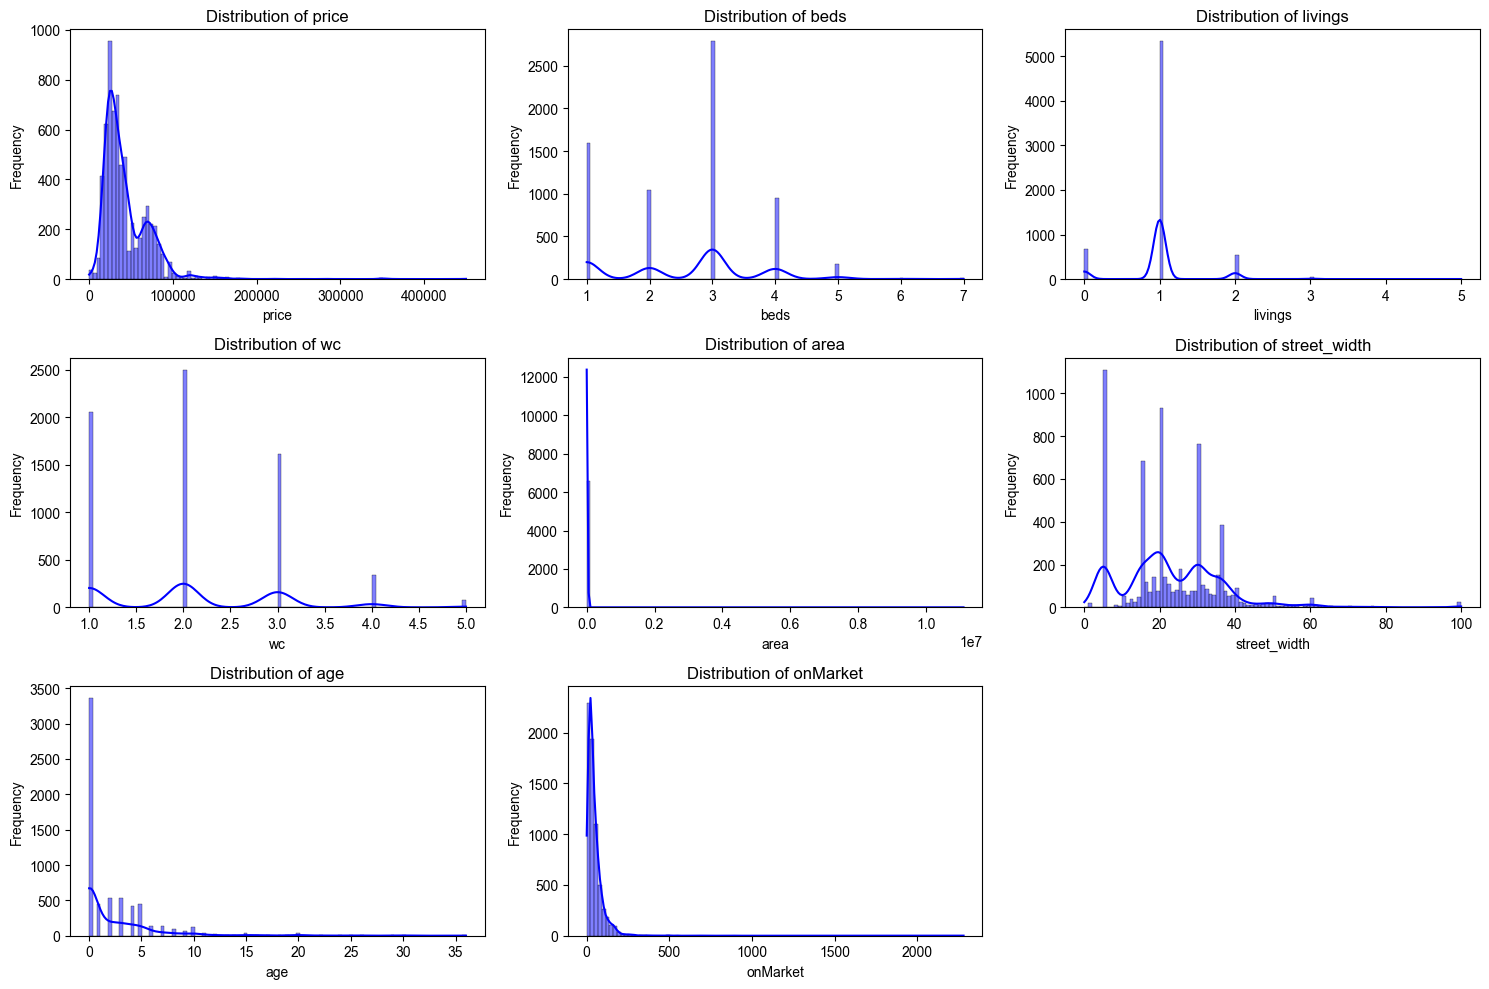

In [1025]:
# List of columns to plot
columns_to_plot = ['price', 'beds', 'livings', 'wc', 'area', 'street_width', 'age', 'onMarket']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns, i-th subplot
    sns.histplot(realEstate[column], kde=True, bins=100, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# We consider outliar of Price value is nutural outliar

# We consider outliar of Beds value is nutural outliar

# We consider outliar of Beds value above 2 is outliar

# We consider outliar of wc value is nutural outliar 

# We consider outliar of Stret width value 100 is nutural outliar and 0 is outliar

# We consider outliar of age value is nutural outliar 

# We see the Area later

In [1026]:
'''
Outlier Handling Rules
Price:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

Beds:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

WC:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

Street Width:

Outlier:

100 is a natural outlier.

0 is an outlier.

Action:

Keep 100 as-is.

Remove or handle 0 values.

Age:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

OnMarket:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

area:

Outlier: 

1100 is outlier.
Natural outliers (no specific threshold).

Action: Keep as-is.

'''


'\nOutlier Handling Rules\nPrice:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nBeds:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nWC:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nStreet Width:\n\nOutlier:\n\n100 is a natural outlier.\n\n0 is an outlier.\n\nAction:\n\nKeep 100 as-is.\n\nRemove or handle 0 values.\n\nAge:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nOnMarket:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\narea:\n\nOutlier: \n\n1100 is outlier.\nNatural outliers (no specific threshold).\n\nAction: Keep as-is.\n\n'

In [1027]:
# realEstate['area'].unique()
# realEstate['area'].max() , realEstate['area'].min()

In [1028]:
# Calculate the 5th and 95th percentiles
lower_threshold = realEstate['area'].quantile(0.06)
upper_threshold = realEstate['area'].quantile(0.99)
lower_threshold , upper_threshold

(16.0, 700.0)

In [1029]:
# Check the rows before apply the filter
print("real Estate Shape:", realEstate.shape)

real Estate Shape: (6587, 16)


In [1030]:
# Filtering properties within the specified area range and sorting by area
realEstate = realEstate[(realEstate['area'] >= lower_threshold) & (realEstate['area'] <= upper_threshold) ]

In [1031]:
# Apply capping
# realEstate = realEstate['area'].clip(lower= 16.0, upper=700.0)

In [1032]:
# Check the rows after apply the filter
print("real Estate Shape:", realEstate.shape)

real Estate Shape: (6135, 16)


## RiyadhVillasAqar

In [1033]:
# Apply describe function 
RiyadhVillasAqar.describe().T

count         mean          std      min          25%  \
Unnamed: 0   46,826.00    25,915.13    14,993.82     0.00    12,925.25   
rooms        46,826.00         4.69         1.10     1.00         4.00   
streetWidth  46,826.00        18.16         4.16     1.00        15.00   
propertyAge  46,826.00         2.45         6.50     0.00         0.00   
driverRoom   46,826.00         0.36         0.48     0.00         0.00   
duplex       46,826.00         0.30         0.46     0.00         0.00   
space        46,826.00       380.02       281.43    50.00       270.00   
maidRoom     46,826.00         0.77         0.42     0.00         1.00   
elevator     46,826.00         0.24         0.42     0.00         0.00   
furnihsed    46,826.00         0.08         0.27     0.00         0.00   
pool         46,826.00         0.12         0.32     0.00         0.00   
basement     46,826.00         0.04         0.19     0.00         0.00   
price        46,826.00 2,347,636.41 2,781,993.35 1,080.00 1,180,000.00   
square price 46,826.00     6,088.06     4,515.75     3.43     3,866.67   

                      50%          75%            max  
Unnamed: 0      25,836.50    38,917.75      51,844.00  
rooms                5.00         5.00           7.00  
streetWidth         20.00        20.00         100.00  
propertyAge          0.00         0.00          35.00  
driverRoom           0.00         1.00           1.00  
duplex               0.00         1.00           1.00  
space              312.00       400.00      10,000.00  
maidRoom             1.00         1.00           1.00  
elevator             0.00         0.00           1.00  
furnihsed            0.00         0.00           1.00  
pool                 0.00         0.00           1.00  
basement             0.00         0.00           1.00  
price        1,600,000.00 2,600,000.00 100,000,000.00  
square price     5,000.00     7,600.00     136,144.58

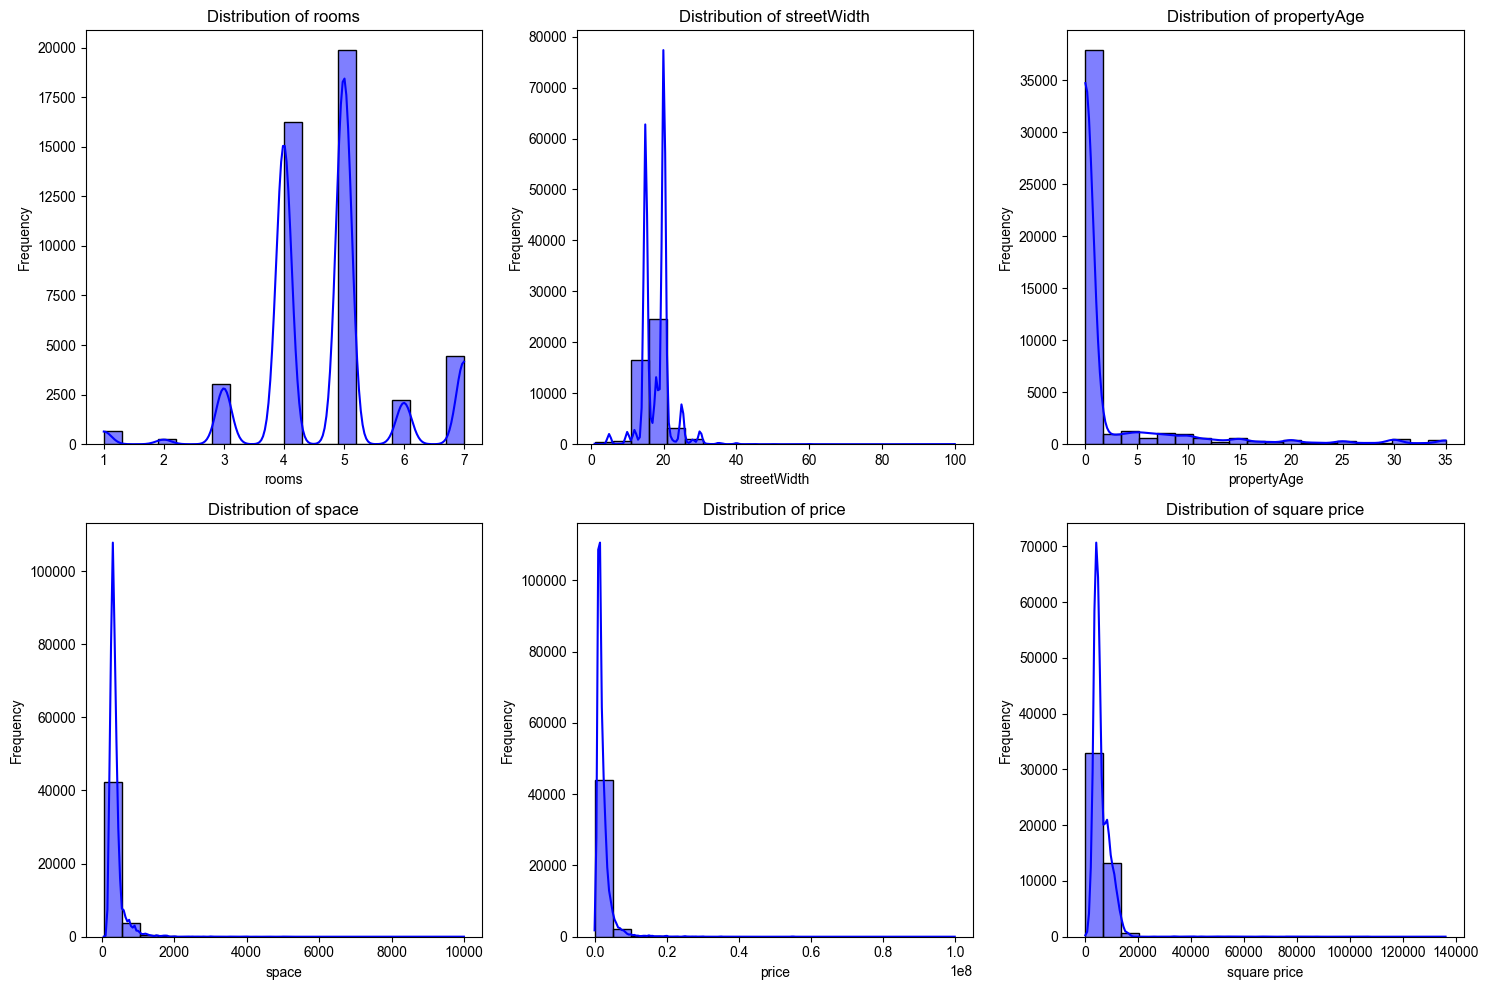

In [1034]:
# List of columns to plot
columns_to_plot = ['rooms', 'streetWidth', 'propertyAge', 'space', 'price', 'square price']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    sns.histplot(RiyadhVillasAqar[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [1035]:
'''
Outlier Handling Rules

Rooms:
Outlier: No outliers.
Action: Keep as-is.

Street Width:
Outlier: Normal (no extreme values).
Action: Keep as-is.

Property Age:
Outlier: Normal (no extreme values).
Action: Keep as-is.

Space:
Outlier: Below 1500 is considered an outlier.
Action: Remove or handle values below 1500.

Price:
Outlier: Below 15,000,000 is considered an outlier.
Action: Remove or handle values below 15,000,000.

Square Price:
Outlier: Values deviating significantly from 10,000.
Action: Normalize around 10,000.

'''
# 'rooms': no outliars 
# 'streetWidth': normal
# 'propertyAge': normal
# 'space': above 1500
# 'price': above 15,000,000
# 'square price': 10000

'\nOutlier Handling Rules\n\nRooms:\nOutlier: No outliers.\nAction: Keep as-is.\n\nStreet Width:\nOutlier: Normal (no extreme values).\nAction: Keep as-is.\n\nProperty Age:\nOutlier: Normal (no extreme values).\nAction: Keep as-is.\n\nSpace:\nOutlier: Below 1500 is considered an outlier.\nAction: Remove or handle values below 1500.\n\nPrice:\nOutlier: Below 15,000,000 is considered an outlier.\nAction: Remove or handle values below 15,000,000.\n\nSquare Price:\nOutlier: Values deviating significantly from 10,000.\nAction: Normalize around 10,000.\n\n'

In [1036]:
# Check the row before apply the filter
print("Riyadh Villas Aqar Shape:", RiyadhVillasAqar.shape)

Riyadh Villas Aqar Shape: (46826, 26)


In [1037]:
# Filter the dataset 'RiyadhVillasAqar' to remove outliers based on specific thresholds:
# 1. Keep rows where 'space' is less than or equal to 1500 (removes properties with unusually large areas)
# 2. Keep rows where 'price' is less than or equal to 15,000,000 (removes properties with unusually high prices)
# 3. Keep rows where 'square price' is less than or equal to 12,500 (removes properties with unusually high price per square unit)
RiyadhVillasAqar = RiyadhVillasAqar[
    (RiyadhVillasAqar['space'] <= 1500) & 
    (RiyadhVillasAqar['price'] <= 15000000) & 
    (RiyadhVillasAqar['square price'] <= 12500)
]

# Check the shape of the filtered dataset to see how many rows and columns remain after removing outliers
RiyadhVillasAqar.shape

(45102, 26)

In [1038]:
# Apply fliter on apartments column to get rid of outliars
values_to_remove = {"10", "12", "15", "11", "14", "30+", "13", "23", "20", "16"}


RiyadhVillasAqar = RiyadhVillasAqar[~RiyadhVillasAqar['apartments'].astype(str).isin(values_to_remove)]

In [1039]:
# Display The Result
RiyadhVillasAqar['apartments'].value_counts()

apartments
0    25295
1     9302
2     8345
3     1680
4      390
5       29
6       12
7        7
8        7
9        1
Name: count, dtype: int64

In [1040]:
# Apply fliter on lounges column to get rid of outliars
values_to_remove = {"7+"}


RiyadhVillasAqar = RiyadhVillasAqar[~RiyadhVillasAqar['lounges'].astype(str).isin(values_to_remove)]

In [1041]:
# Display The Result
RiyadhVillasAqar['lounges'].value_counts()

lounges
2    20210
3    12499
1     7771
4     2650
5     1928
Name: count, dtype: int64

## Riyadh_Aqqar

-------------------

In [1042]:
# Apply describe function 
Riyadh_Aqqar.describe().T

count         mean           std      min        25%  \
Area         2,155.00     1,568.78      9,758.00     1.00     413.00   
Square Price 2,155.00     4,356.65     35,214.81    90.00   1,365.00   
Price        2,155.00 5,050,271.25 31,417,987.06 1,400.00 781,000.00   

                      50%          75%            max  
Area               670.00       900.00     299,684.00  
Square Price     2,570.00     4,000.00     945,000.00  
Price        1,442,000.00 3,150,000.00 893,025,000.00

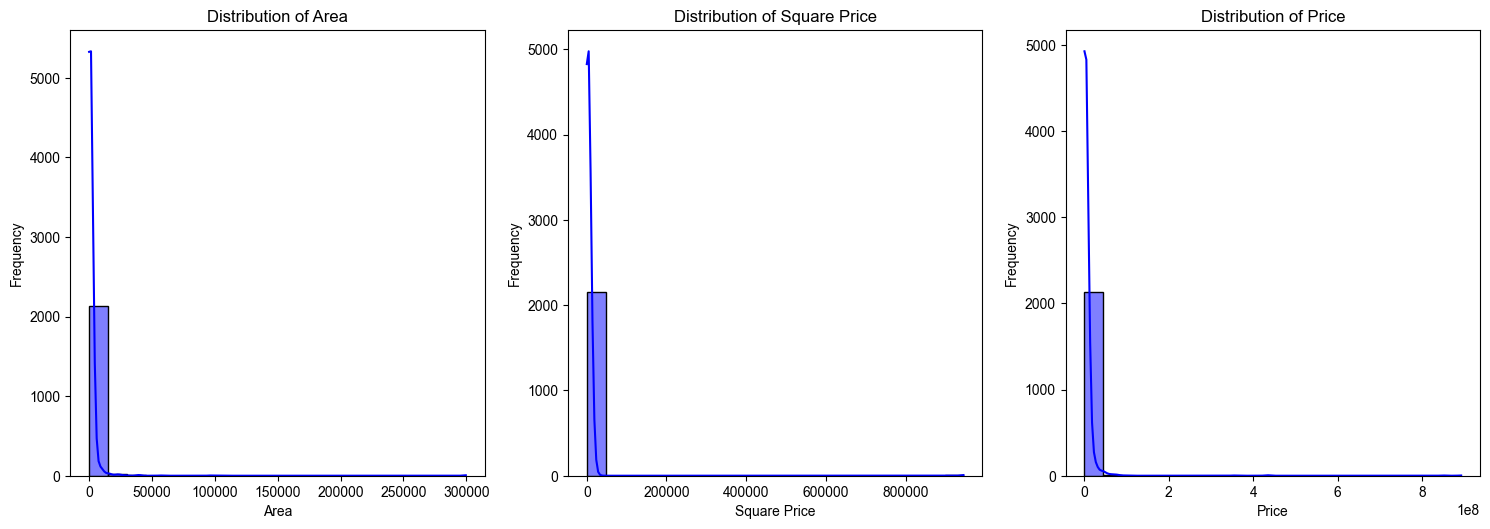

In [1043]:
# List of columns to plot
columns_to_plot = ['Area', 'Square Price', 'Price']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    sns.histplot(Riyadh_Aqqar[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [1044]:
# # Check the row before apply the filter
print("Riyadh Aqar Shape:", Riyadh_Aqqar.shape)

Riyadh Aqar Shape: (2155, 7)


In [1045]:
# Filtering properties based on specific criteria
Riyadh_Aqqar = Riyadh_Aqqar[
    (Riyadh_Aqqar['Area'] <= 10000) & 
    (Riyadh_Aqqar['Price'] <= 25000000) & 
    (Riyadh_Aqqar['Square Price'] <= 20000)
]

In [1046]:
# # Check the row after apply the filter
print("Riyadh Aqar Shape:", Riyadh_Aqqar.shape)

Riyadh Aqar Shape: (2083, 7)


## Riyadh_Aqqar_Apartments

-------------------

In [1047]:
# Apply describe function 
Riyadh_Aqqar_Apartments.describe().T

count         mean        std        min        25%  \
Number of Rooms        551.00         3.03       0.76       1.00       3.00   
Number of Living Rooms 551.00         1.25       0.44       1.00       1.00   
Area                   551.00       151.63      41.42      43.00     126.00   
Floor                  551.00         1.08       3.33      -1.00       0.00   
Property Age           551.00         1.38       2.95       0.00       0.00   
Total Price            551.00 1,137,539.47 331,582.52 700,000.00 900,000.00   
Square Price           551.00     7,837.26   2,666.20   3,416.94   6,254.25   

                                50%          75%          max  
Number of Rooms                3.00         3.00         6.00  
Number of Living Rooms         1.00         1.00         3.00  
Area                         142.00       169.00       428.00  
Floor                          1.00         1.00        59.00  
Property Age                   0.00         1.00        13.00  
Total Price            1,100,000.00 1,270,000.00 3,500,000.00  
Square Price               7,425.68     8,571.43    25,581.40

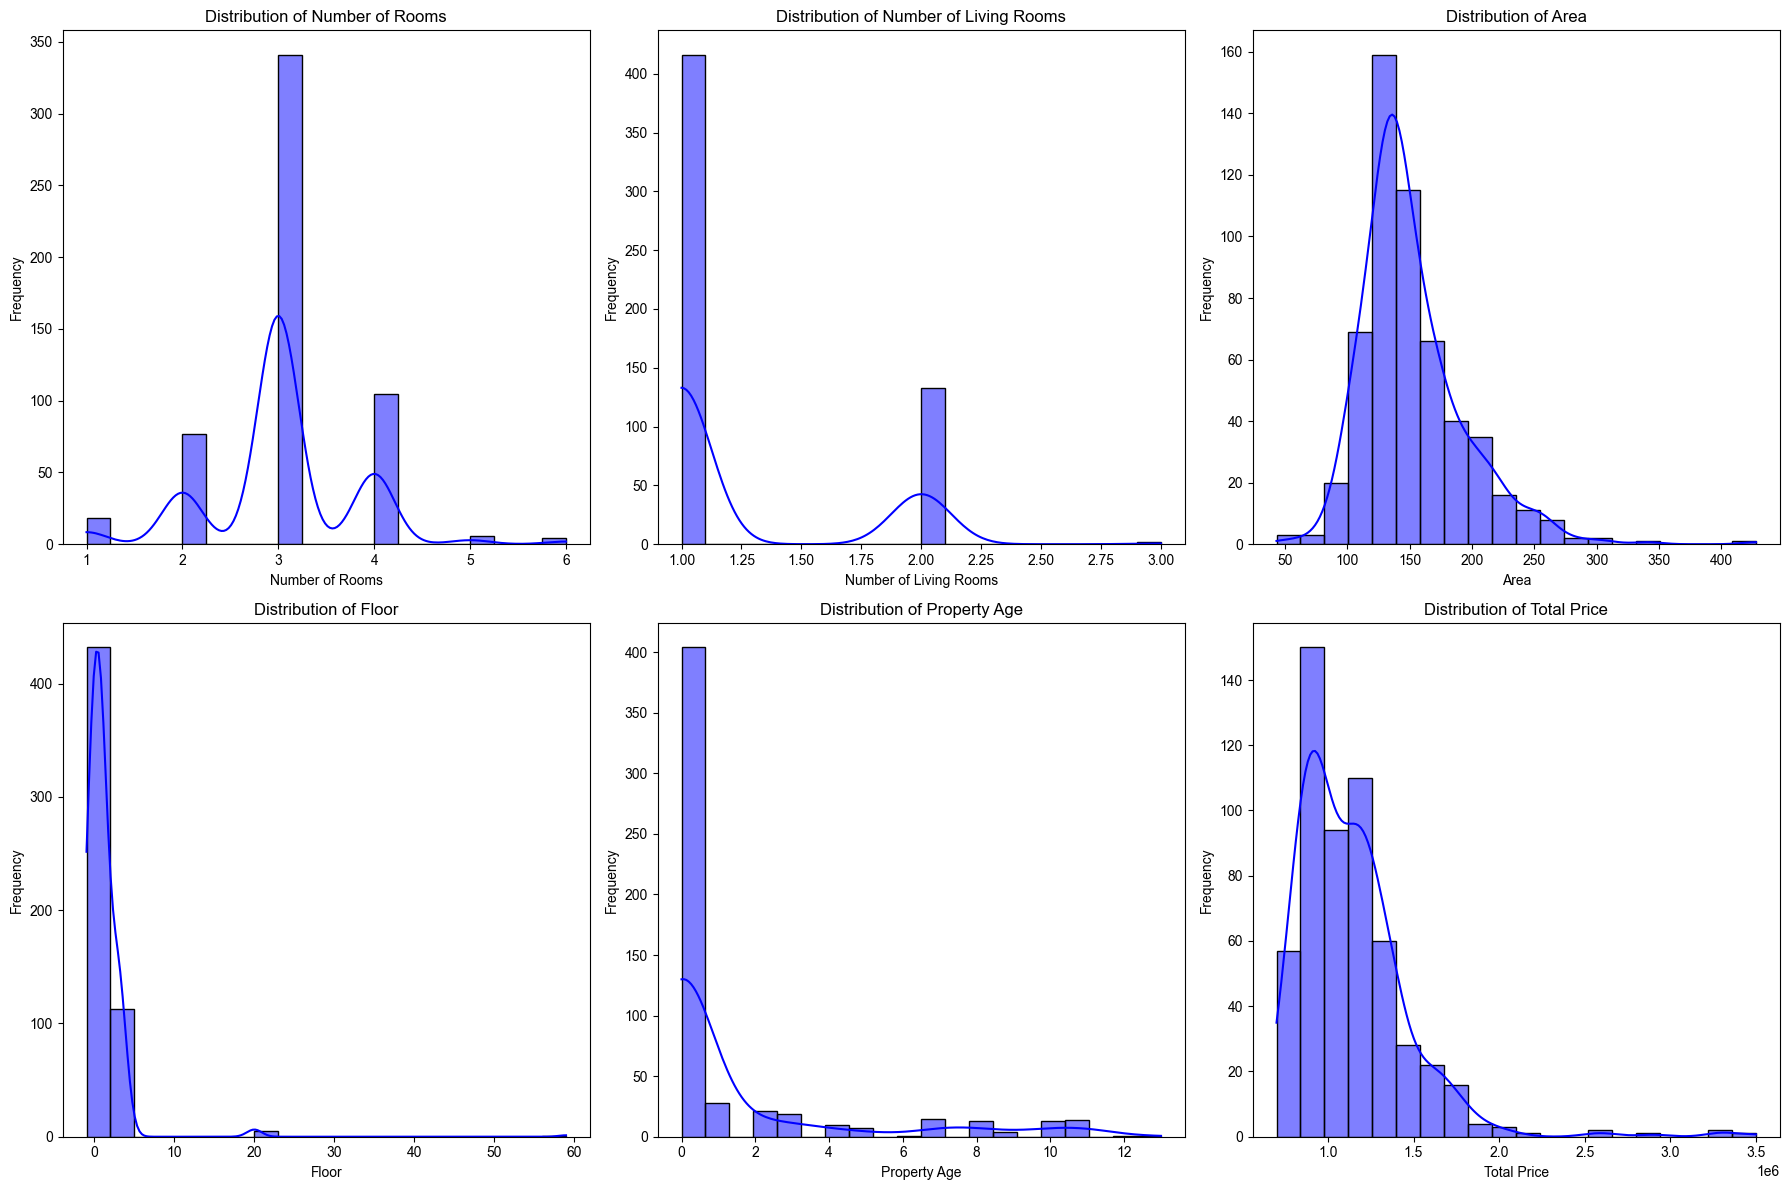

In [1048]:
# List of columns to plot
columns_to_plot = [
    'Number of Rooms', 'Number of Living Rooms', 'Area', 
    'Floor', 'Property Age', 'Total Price'
]

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    sns.histplot(Riyadh_Aqqar_Apartments[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [1049]:
# In Riyadh_Aqqar_Apartments Dataset:
# Retaining natural outliers
# Initially, we considered removing extreme values based on predefined thresholds.
# However, these values represent natural variations in the dataset rather than anomalies.
# Removing them would not add value to the analysis, so we retain all data points.

## Riyadh_Aqqar_Villas 

-------------------

In [1050]:
# Apply describe function 
Riyadh_Aqqar_Villas.describe().T

count         mean          std        min          25%  \
Street Width 1,090.00        15.96         3.29       5.00        15.00   
Area         1,090.00       469.89     1,379.11      25.00       276.00   
Total Price  1,090.00 2,629,099.57 2,092,205.48 300,000.00 1,500,000.00   

                      50%          75%           max  
Street Width        15.00        15.00         40.00  
Area               350.00       450.00     32,020.00  
Total Price  2,150,000.00 3,000,000.00 22,500,000.00

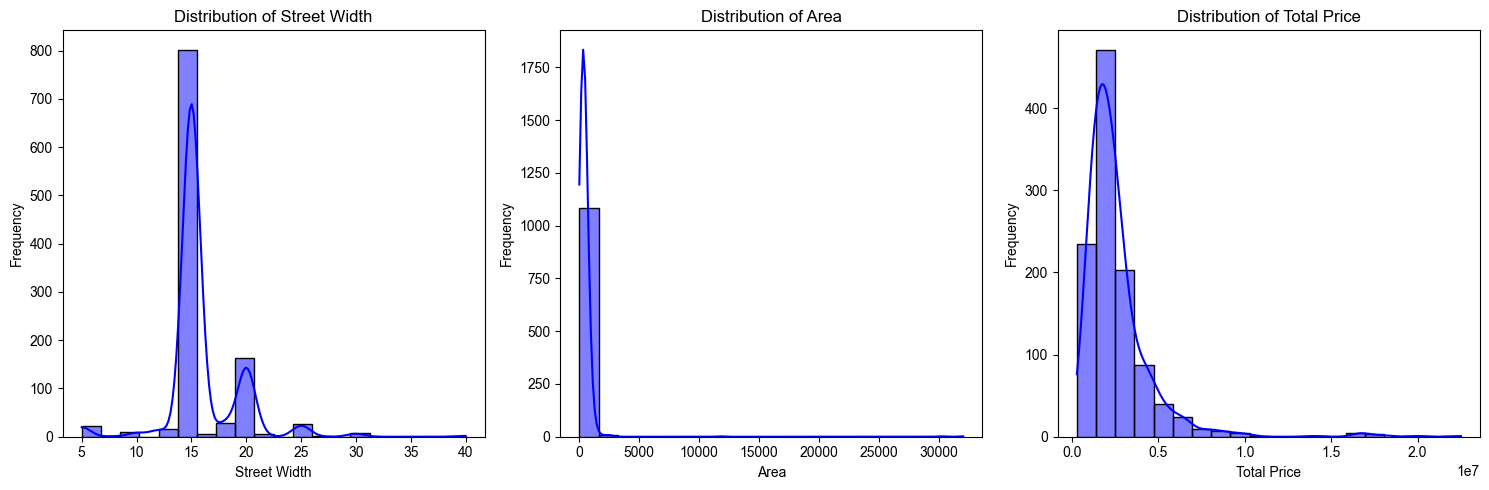

In [1051]:
# List of columns to plot
columns_to_plot = ['Street Width', 'Area', 'Total Price']

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, i-th subplot
    sns.histplot(Riyadh_Aqqar_Villas[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [1052]:
# View the data for better understand
Riyadh_Aqqar_Villas.sort_values(by='Area', ascending = False)

Property Type                                District       Frontage  \
889           فيلا                                حي الشرق         جنوبية   
1040          فيلا                               حي الرمال   شمالية غربية   
128           فيلا                               حي العارض          غربية   
349           فيلا                              حي الحمراء          غربية   
122           فيلا                                حي الندى          غربية   
324           فيلا                                حي قرطبة          غربية   
63            فيلا                               حي النزهة     ثلاث شوارع   
248           فيلا                               حي النخيل   جنوبية شرقية   
41            فيلا                               حي الملقا          شرقية   
704           فيلا                               حي الربوة         شمالية   
86            فيلا                               حي العليا         جنوبية   
840           فيلا                              حي السعادة          شرقية   
908           فيلا                              حي السعادة          شرقية   
404           فيلا                              حي الحمراء          غربية   
1060          فيلا                              حي الحمراء          شرقية   
367           فيلا                              حي الحمراء          شرقية   
8             فيلا                               حي النخيل   شمالية غربية   
24            فيلا                               حي الملقا   شمالية غربية   
328           فيلا                              حي الحمراء          غربية   
520           فيلا                               حي الزهرة         شمالية   
209           فيلا                             حي الياسمين   شمالية شرقية   
393           فيلا                                حي قرطبة         شمالية   
54            فيلا                               حي النزهة   شمالية شرقية   
890           فيلا                        حي النسيم الشرقي   جنوبية شرقية   
836           فيلا                        حي النسيم الشرقي   جنوبية شرقية   
915           فيلا                        حي النسيم الشرقي   جنوبية شرقية   
214           فيلا                            حي الملك فهد   جنوبية غربية   
430           فيلا                               حي الرمال         شمالية   
987           فيلا                               حي الرمال         شمالية   
511           فيلا                                 حي طويق   شمالية شرقية   
600           فيلا                              حي المهدية          شرقية   
446           فيلا                              حي الشهداء          شرقية   
259           فيلا                               حي الروضة         جنوبية   
353           فيلا                                حي القدس         شمالية   
369           فيلا                                حي القدس          غربية   
87            فيلا                               حي العليا   شمالية غربية   
450           فيلا                               حي غرناطة          شرقية   
254           فيلا                                حي القدس         شمالية   
449           فيلا                              حي اليرموك          شرقية   
447           فيلا                               حي غرناطة          شرقية   
748           فيلا                                حي القدس         شمالية   
448           فيلا                              حي اشبيلية          شرقية   
33            فيلا                               حي العارض          غربية   
253           فيلا                                حي القدس         شمالية   
601           فيلا                                 حي عكاظ         جنوبية   
211           فيلا                               حي العليا   جنوبية غربية   
325           فيلا                              حي اشبيلية          شرقية   
280           فيلا                           حي الملك فيصل   شمالية شرقية   
658           فيلا                                حي الشفا         جنوبية   
850           فيلا                             حي المونسية         شمالية   
703           فيلا                               حي الربوة     ثلاث شوارع   
3

In [1053]:
# Check the row before apply the filter
print("Riyadh Aqar Villas Shape:", Riyadh_Aqqar_Villas.shape)

Riyadh Aqar Villas Shape: (1090, 19)


In [1054]:
# Filtering out properties with an area greater than 30,000
Riyadh_Aqqar_Villas = Riyadh_Aqqar_Villas[
    (Riyadh_Aqqar_Villas['Area'] <= 30000)
]

In [1055]:
# Check the row after apply the filter
print("Riyadh Aqar Villas Shape:", Riyadh_Aqqar_Villas.shape)

Riyadh Aqar Villas Shape: (1088, 19)


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

# 1️⃣ How many properties are listed in each Riyadh region?

In [1066]:
location_counts = RiyadhVillasAqar['location'].value_counts()


location_counts.to_frame(name="Count")
# for the first question, how many villas in each region

Count
location          
غرب الرياض   13460
شرق الرياض   12671
شمال الرياض   9790
جنوب الرياض   8923
وسط الرياض     214

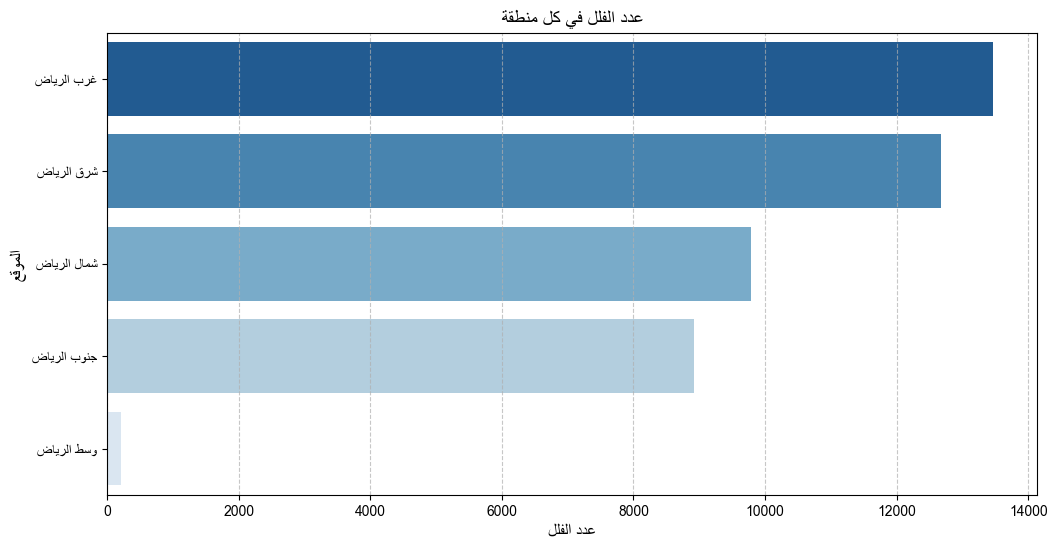

In [1100]:
plt.rcParams['font.family'] = 'Arial'

def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

location_counts = RiyadhVillasAqar['location'].value_counts().head(10)

fixed_labels = fix_arabic_labels(location_counts.index)

plt.figure(figsize=(12, 6))


sns.barplot(x=location_counts.values, y=fixed_labels, palette="Blues_r")
# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الفلل")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الموقع")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد الفلل في كل منطقة")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 2️⃣ What is the avarage price of villas based on Riyadh regions ?

In [1056]:
RiyadhVillasAqar.groupby('location')['square price'].mean().sort_values(ascending=False) 

location
شمال الرياض   9,221.57
شرق الرياض    5,648.98
غرب الرياض    4,624.49
وسط الرياض    3,654.48
جنوب الرياض   3,390.67
Name: square price, dtype: float64

C:\Users\sulta\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


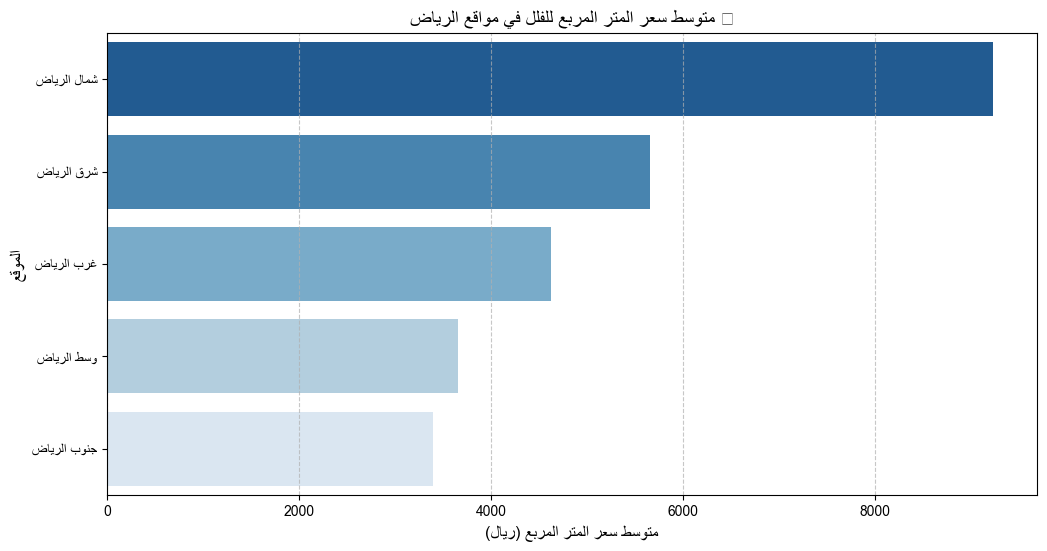

In [1098]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Ensure font supports Arabic
plt.rcParams['font.family'] = 'Arial'

# Function to reshape Arabic labels for correct display
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

# Group by location and calculate average square price
location_avg_price = RiyadhVillasAqar.groupby('location')['square price'].mean().sort_values(ascending=False).head(10)

# Fix Arabic labels for location names
fixed_labels = fix_arabic_labels(location_avg_price.index)

# Create figure
plt.figure(figsize=(12, 6))

# Bar plot
sns.barplot(x=location_avg_price.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط سعر المتر المربع (ريال)")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الموقع")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("📊 متوسط سعر المتر المربع للفلل في مواقع الرياض")), fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# 3️⃣ What is the lowest avarage price of villas based on Riyadh north region district ?

In [1064]:
FilterNorth = RiyadhVillasAqar[(RiyadhVillasAqar['location'] == 'شمال الرياض')].sort_values(by = 'square price', ascending = False)

FilterNorth1 = FilterNorth.groupby('neighbourhood')['square price'].mean().sort_values()

FilterNorth1

neighbourhood
بنبان                     2,000.00
الخير                     3,173.27
الملك عبدالعزيز           4,149.38
عقرباء                    4,850.00
المصيف                    4,917.24
الرمال                    5,136.75
السليمانية                5,664.35
مطار الملك خالد الدولي    5,735.12
الملك فهد                 5,764.81
صلاح الدين                5,979.51
الورود                    6,558.90
العليا                    6,673.50
المرسلات                  6,835.87
المغرزات                  7,141.33
النفل                     7,316.82
الواحة                    7,489.76
غير محدد                  7,627.23
المروج                    7,652.36
النزهة                    7,735.63
الرحمانية                 7,766.38
الفلاح                    7,858.06
العقيق                    8,131.52
التعاون                   8,270.47
الكتاني                   8,648.68
المعذر الشمالي            8,651.52
الغدير                    8,745.47
العارض                    8,869.53
الصحافة                   8,872.93
الملك 

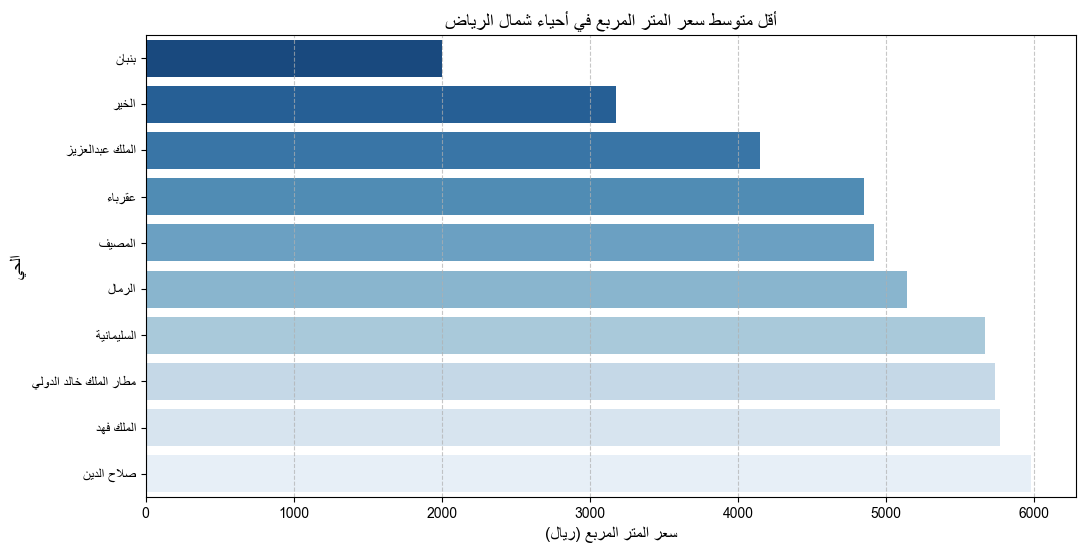

In [1108]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Ensure font supports Arabic
plt.rcParams['font.family'] = 'Arial'

# Function to reshape Arabic labels for correct display
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

# Filter data for 'شمال الرياض' location and sort by square price
FilterNorth = RiyadhVillasAqar[(RiyadhVillasAqar['location'] == 'شمال الرياض')].sort_values(by='square price')

# Group by neighbourhood and calculate the average square price
FilterNorth1 = FilterNorth.groupby('neighbourhood')['square price'].mean().sort_values().head(10)

# Fix Arabic labels for neighbourhood names
fixed_labels = fix_arabic_labels(FilterNorth1.index)

# Create figure
plt.figure(figsize=(12, 6))

# Barplot
sns.barplot(x=FilterNorth1.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("سعر المتر المربع (ريال)")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("أقل متوسط سعر المتر المربع في أحياء شمال الرياض")), fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# 4️⃣ Which districts in Riyadh have the highest number of properties, and what are the most common purposes of it highest district?

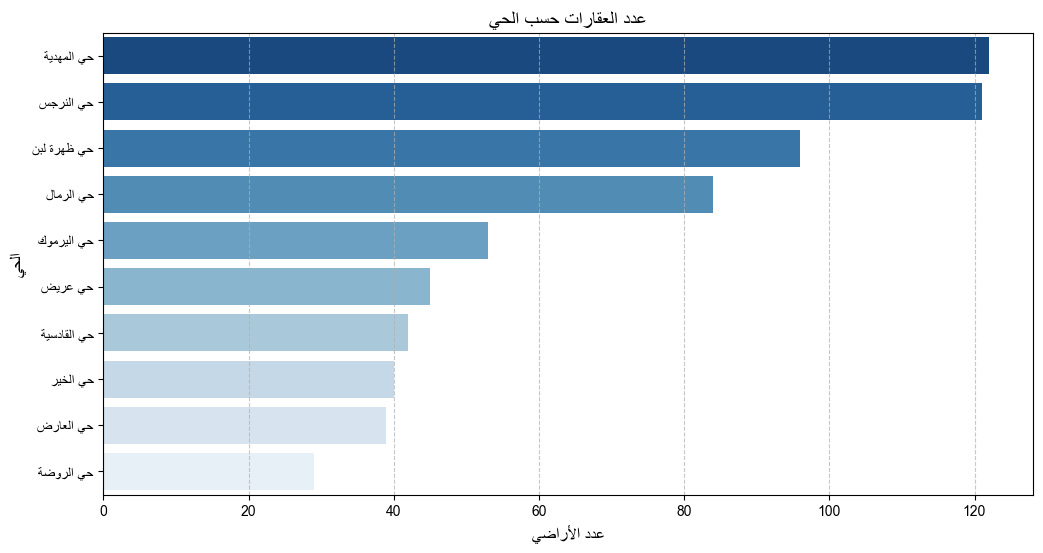

In [1114]:
plt.rcParams['font.family'] = 'Arial'


def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]


district_counts = Riyadh_Aqqar[Riyadh_Aqqar['District'] != 'غير محدد'].groupby('District').size().sort_values(ascending=False).head(10)


fixed_labels = fix_arabic_labels(district_counts.index)


plt.figure(figsize=(12, 6))

sns.barplot(x=district_counts.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الأراضي")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد العقارات حسب الحي")), fontsize=14)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

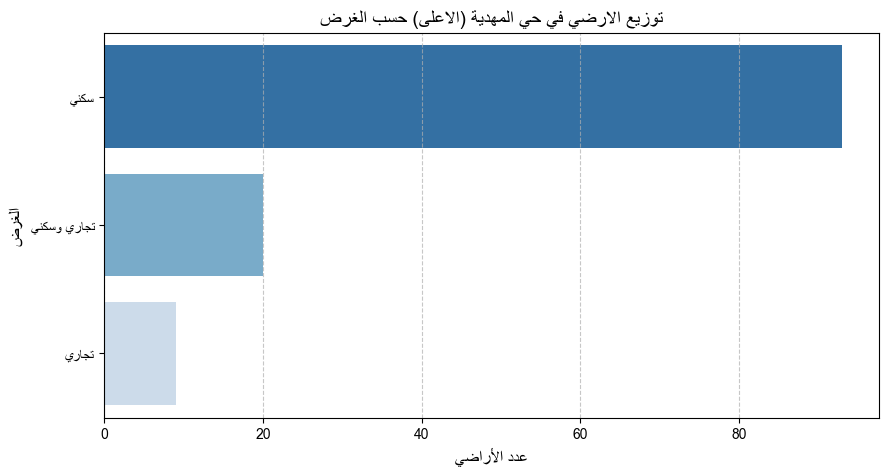

In [1115]:
plt.rcParams['font.family'] = 'Arial'

def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]


highest_district_data = Riyadh_Aqqar[Riyadh_Aqqar['District'] == 'حي المهدية']


purpose_counts = highest_district_data['Purpose'].value_counts()


fixed_labels = fix_arabic_labels(purpose_counts.index)


plt.figure(figsize=(10, 5))


sns.barplot(x=purpose_counts.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الأراضي")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الغرض")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("توزيع الارضي في حي المهدية (الاعلى) حسب الغرض")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5️⃣ What is the best district for investment opportunities based on demand?

In [1085]:
# Format float values to display with two decimal places and thousands separator
pd.options.display.float_format = '{:,.2f}'.format  

# Group by District and calculate the average Total Price, then sort the values
Riyadh_Aqqar_Apartments.groupby('District')['Total Price'].mean().sort_values()



District
حي العقيق                     820,000.00
حي المصيف                     957,833.33
حي الوادي                     965,285.71
حي العارض                   1,003,527.77
حي النرجس                   1,018,184.33
حي الملك فهد                1,040,000.00
حي الياسمين                 1,068,645.16
حي المروج                   1,071,909.09
حي الفلاح                   1,111,333.33
حي الندى                    1,149,333.33
غير محدد                    1,160,016.67
حي النفل                    1,181,111.11
حي القيروان                 1,215,348.83
حي التعاون                  1,220,000.00
حي الملقا                   1,226,169.27
حي المغرزات                 1,263,857.14
حي حطين                     1,270,388.89
                            1,315,000.00
شارع عبدالله بن العاص       1,350,000.00
حي النزهة                   1,357,500.00
حي الربيع                   1,388,428.57
حي المرسلات                 1,400,000.00
حي النخيل                   1,660,000.00
حي الصحافة                  1,719,875.00
حي العل

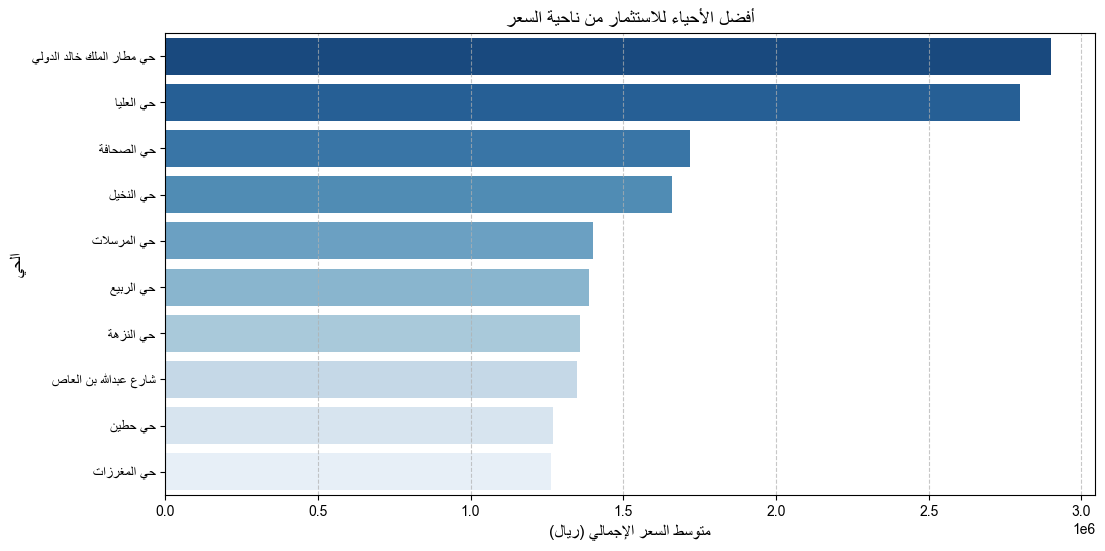

In [1109]:
# Ensure font supports Arabic
plt.rcParams['font.family'] = 'Arial'

# Function to reshape Arabic labels for correct display
def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

# Filter out empty district names
filtered_data = Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments['District'] != '']

# Group by District and calculate the average Total Price
district_avg_price = filtered_data.groupby('District')['Total Price'].mean().sort_values(ascending=False).head(10)

# Fix Arabic labels for district names
fixed_labels = fix_arabic_labels(district_avg_price.index)

# Create a figure
plt.figure(figsize=(12, 6))

# Bar plot
sns.barplot(x=district_avg_price.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر الإجمالي (ريال)")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("أفضل الأحياء للاستثمار من ناحية السعر")), fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

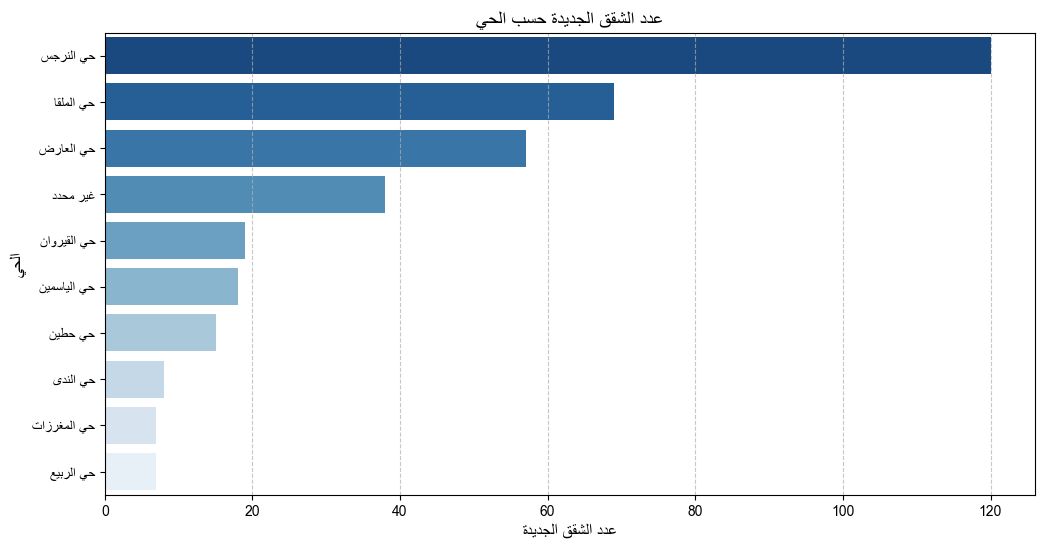

In [1112]:
plt.rcParams['font.family'] = 'Arial'


def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]


new_apartments = Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments['Property Age'] == 0]
new_apartments_count = new_apartments.groupby('District').size().sort_values(ascending=False).head(10)


fixed_labels = fix_arabic_labels(new_apartments_count.index)


plt.figure(figsize=(12, 6))


sns.barplot(x=new_apartments_count.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الشقق الجديدة")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد الشقق الجديدة حسب الحي")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 6️⃣ How can the districts be categorized based on the availability of furnished or unfurnished apartments?

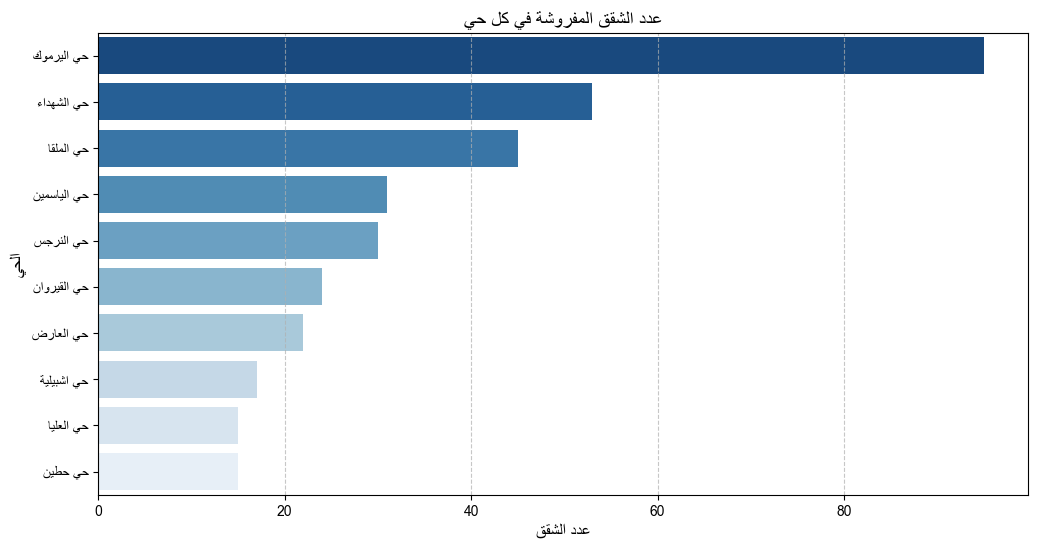

In [1110]:
plt.rcParams['font.family'] = 'Arial'

def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

furnished_apartments = realEstate[
    (realEstate['furnished'] == True) & (realEstate['district'] != 'غير محدد')
]

furnished_apartments_count = furnished_apartments.groupby('district').size().sort_values(ascending=False).head(10)

fixed_labels = fix_arabic_labels(furnished_apartments_count.index)

plt.figure(figsize=(12, 6))

sns.barplot(x=furnished_apartments_count.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الشقق")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد الشقق المفروشة في كل حي")), fontsize=14)


plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

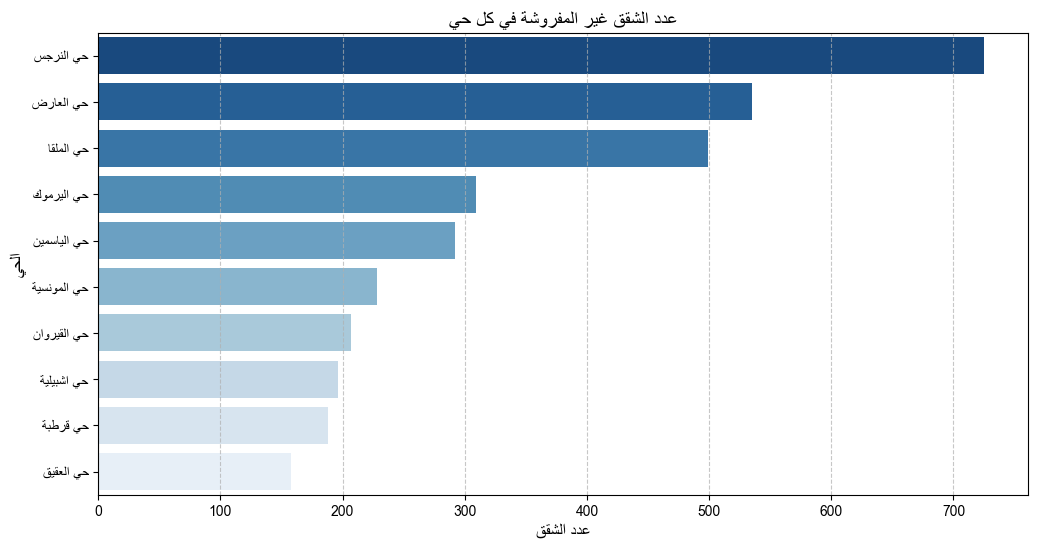

In [1111]:
plt.rcParams['font.family'] = 'Arial'

def fix_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(str(label))) for label in labels]

furnished_apartments = realEstate[
    (realEstate['furnished'] == False) & (realEstate['district'] != 'غير محدد')
]

furnished_apartments_count = furnished_apartments.groupby('district').size().sort_values(ascending=False).head(10)

fixed_labels = fix_arabic_labels(furnished_apartments_count.index)

plt.figure(figsize=(12, 6))

sns.barplot(x=furnished_apartments_count.values, y=fixed_labels, palette="Blues_r")

# Labels and title
plt.xlabel(get_display(arabic_reshaper.reshape("عدد الشقق")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("عدد الشقق غير المفروشة في كل حي")), fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()